**Colab notebook link**:https://drive.google.com/file/d/1RW6bBQDdG6ramTq_4kzi7vTSDX8w5pou/view?usp=sharing


**Team B01**

**Team members**: Han Nga Chan, Jinke Han, Min Xu, Mingze Wu, Yiming Wang

# **Screen Success: Analyzing TV Series Data Dynamics**

# **I. Report summary**

This project aims to dissect and analyze historical trends in the television industry.In this analysis, SQL is used to query and analyze IMDb's TV shows database. Insights from the analysis provide valuable guidance and strategic benchmarks for TV series producers and stakeholders, emphasizing the balance of quality content, strategic genre selection, understanding audience preferences, and prioritizing efficient production teams as essential elements for achieving higher ratings. It is crucial to create a concise single-season program or ensure sustained quality over multiple seasons, with episode lengths preferably under 30 minutes or moderately extended to 45-60 minutes. Second, drawing inspiration from successful eras, particularly the 1950s through the 1970s, can provide valuable guidance in developing successful television shows. Genre selection is pivotal as well. Drama and comedy's historical dominance may stem from nostalgia-inducing classic productions. Regional analysis shows a modest correlation between a show's rating. Last but not least, Assembling a competent production team is crucial, focusing on casting, music, and writing aligned with audience preferences.


# **II.Entity Relationship Diagram**

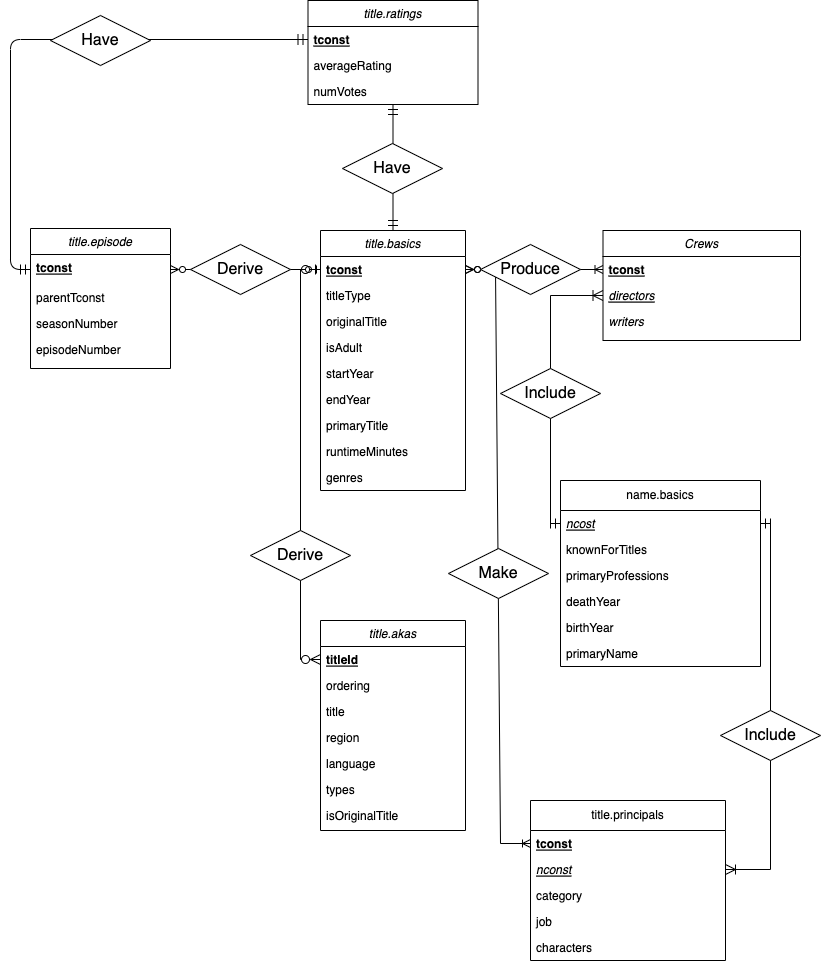

Our dataset comprises seven entities (tables), primarily categorized into TV series and Crews. Entities primarily focusing on TV series information include title.basics, title.akas, title.episode, and title.rating. Those emphasizing crew details consist of title.principals, name.basics, and crews.

Information pertaining to TV series entities is predominantly linked via the unique key 'tconst' or 'titleId' in title.akas. The title.basics table contains core information like title names and unique 'tconst' keys for each TV series. Within title.basics, each TV series might have derived episodes, stored in the title.episode table. The episode and akas recorded may have or may not have record in the title.basic table. For every episode in title.episode and each TV series in title.basics, there exists a singular entry for ratings recorded in title.ratings, although not guaranteed for all series. Additionally, TV series in title.basics may or may not have diverse translations or air in different regions.

Entities focusing on crews are mostly interlinked through two unique keys, 'tconst' and 'nconst,' bridging various tables. Beginning from the crews table, each crew can contribute to numerous TV series, while each TV series may involve various crews. Each TV series must be produced by at least one or more crews. The title.principals entity encompasses information about different leaders in production groups involved in TV series production. Multiple principals can participate in the production of a single TV series, and each principal may be involved in multiple TV series. Each TV series must be produced by at least one or more principals. The name.basics table contains crew member details, where individuals can direct multiple TV series (as recorded in the crews table) or act as principals in different TV series (as noted in the title.principals table). And that the name recorded in the title.principals and crews table must be included in the name.basics table.

# **III.Business Problem Definition and Data Overview**

## 1.Problem Definition

In an ever-evolving landscape of television entertainment, the ability to create successful TV series is not just an artistic endeavor but a strategic imperative for producers and networks.  Our project focuses on decoding the formula behind successful TV series, offering solid data-backed support to producers crafting top-tier content. Recognizing the patterns of past triumphs allows producers to fine-tune their approach to align with the evolving tastes of today's audiences. We will delve into:

**Time Dynamics** - Analyzing the time cycle from the production to the release of TV series, exploring the impact of timing on the success of TV series.

**Genre Analysis** - Through a detailed study of the market performance of different genres of TV series, our goal is to identify specific trends and preferences that can inform the genre selection and thematic development of new series. Understanding the temporal dynamics is pivotal for aligning content creation with the evolving tastes of contemporary audiences.

**Regional Influence** - Our analysis will extend to the popularity of TV series in different regions, assessing how geographical and cultural factors contribute to the success of TV series for different audience groups.

**Production Crew** - Exploring the composition and experience of production teams to determine how these elements correlate with the quality and success of TV series.

By thoroughly exploring these four dimensions of TV series, we seek to reveal the subtle interplay of these factors in shaping the success of TV series. It's a strategic initiative with significant business implications. Our ultimate goal is to enable producers to deeply understand these dynamics, make informed decisions, mitigate risks, and maximize the potential for each production. This, in turn, translates to increased viewership, advertiser interest, and overall profitability in the competitive realm of television entertainment.



---



## 2.Business Significance

As the entertainment industry continues to flourish and TV series gain global popularity, projections by the Global Business Accelerator anticipate exponential growth from 2023 to 2030. Amidst this growth, the competition to produce high-quality, highly-rated TV series intensifies, making it increasingly challenging to stand out.

Creating a top-rated TV series involves meticulous consideration of various factors mentioned earlier: understanding audience genre preferences, tailoring episode runtime for optimal impact, assembling suitable directors and crews at an efficient size, and selecting suitable regions and languages for filming to balance production costs, customer retention, and profits.

This project offers multifaceted insights guiding producers toward crafting successful TV series that set them apart from competitors, enabling them to achieve business goals and yield significant returns on their investment. The project's business value is substantial, serving as a comprehensive resource for producers and investors planning to venture into the creation of new TV series.










---



## 3.Data source and overview



#### 3.1 Data Source

*   The dataset is from the “IMDB Developer”.
*   The dataset files can be accessed and downloaded from https://datasets.imdbws.com/.
*   Documentation for these data files can be found at http://www.imdb.com/interfaces/.


#### 3.2 Data Overview

The Dataset includes 7 tables:


Table name | No. rows | No. columns | Data type | Description
-----------|----------|-------------|-----------|------------
name.basics | 3,586,804 | 6 | Integer | Information about people in the entertainment industry
title.akas | 4,219,099 | 8 | Object, Integer | Alternative titles for titles in different regions and languages
title.basics | 305,314 | 9 | Object, Float | Information about titles, including type, primary title, release year, and genre
title.crew | 6,733,524 | 3 | Object | Lists the directors and writers associated with specific titles
title.episode | 7,844,602 | 4 | Object | Describes the relationship between TV series and their episodes
title.principals | 58,929,801 | 6 | Object | Details the individuals and their roles involved in the TV industry
title.ratings | 1,366,239 | 3 | Object, Integer, Float | Ratings and vote counts for titles


# **IV. Data Cleaning and Restructuring**

## 1.Data Cleaning

**Table1: name**

The table "name" is related to individuals, in the context of the TV series industry where birth and death years, primary professions, and the TV series they are known for are relevant attributes.

We create a cleaned version  "name_cleaned" of the original table, removing rows with missing values, and splitting the knownForTitles and primaryProfession columns into separate tables, respectively, to make the table tidy enough to perform queries.

In [ ]:
%%bigquery --project=ba775-b01

--create a new table that contains cleaned raw data - name_cleaned
CREATE OR REPLACE TABLE `ba775-b01.project_data.name_cleaned` AS
SELECT * FROM `ba775-b01.project_data.name`;

--delete missing values
DELETE
FROM `ba775-b01.project_data.name_cleaned`
WHERE primaryProfession IS NULL OR knownForTitles = r'\N' OR knownForTitles IS NULL;

--display a preview of the table
SELECT *
FROM `ba775-b01.project_data.name_cleaned`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0791222,Percy Bysshe Shelley,1792,1822,"writer,miscellaneous","tt7996170,tt0775079,tt19512288,tt0010012"
1,nm1171651,Henrik Anker Bjerregaard,1792,1842,writer,tt0017888


In [ ]:
%%bigquery --project=ba775-b01

--create split knownForTitles table - name_cleaned_knownForTitles
CREATE OR REPLACE TABLE `ba775-b01.project_data.name_cleaned_knownForTitles` AS
SELECT
  nconst,
  primaryName,
  birthYear,
  deathYear,
  knownForTitles
FROM `ba775-b01.project_data.name_cleaned`,
UNNEST(SPLIT(knownForTitles, ',')) AS knownForTitles;

--display a preview of the table
SELECT *
FROM `ba775-b01.project_data.name_cleaned_knownForTitles`
LIMIT 2;


Query is running:   0%|          |

Downloading:   0%|          |

,nconst,primaryName,birthYear,deathYear,knownForTitles
0,nm0208870,Arcipreste de Hita,1283,1350,tt0071750
1,nm0357201,Jacques Fromental Halévy,1799,1862,tt1823783


In [ ]:
%%bigquery --project=ba775-b01

--create split primaryProfession table - name_cleaned_primaryProfession
CREATE OR REPLACE TABLE `ba775-b01.project_data.name_cleaned_primaryProfession` AS
SELECT
  nconst,
  primaryName,
  birthYear,
  deathYear,
  primaryProfession
FROM `ba775-b01.project_data.name_cleaned`,
UNNEST(SPLIT(primaryProfession, ',')) AS primaryProfession;

--display a preview of the table
SELECT *
FROM `ba775-b01.project_data.name_cleaned_primaryProfession`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,nconst,primaryName,birthYear,deathYear,primaryProfession
0,nm0293039,Aleksander Fredro,1793,1876,writer
1,nm1563088,John Keats,1795,1821,writer


**Table2: akas**


The 'akas' table contains details about title changes and the language of titles when TV series are broadcasted in different global locations. This table comprises columns such as titleID (equivalent to tconst in other tables), ordering, title, region, language, types, attributes, and isOriginalTitle. Given that the 'attributes' column lacks informative content and mainly consists of comments, it has been dropped from our analysis.

Our primary focus is to analyze the regions where TV series are aired. To ensure data quality, we primarily cleaned the 'region' column by removing null values and rectifying invalid country codes through online research. Despite encountering numerous null values in the 'language' and 'types' columns, we opted not to clean these columns to avoid significant data loss, which could impact our analysis of the regions where TV series are broadcasted.

In [ ]:
%%bigquery --project=ba775-b01

-- check for the country code that does not exist
-- Most of the country code only contain 2 characters, hence filter the special case in the NOT IN condition
WITH len_num AS
(
    SELECT region, LENGTH(region) AS len
    FROM `ba775-b01.project_data.akas`
)
SELECT DISTINCT region, len
FROM len_num
WHERE (region != r'\N' AND region NOT IN ('CSHH', 'CSXX','DDDE','SUHH','YUCS')) AND len > 2

-- After researching online, XWW, XAS, XSA, XAU, XPI, XSI, XNA, XKO are invalid country code

Query is running:   0%|          |

Downloading:   0%|          |

,region,len
0,XSA,3
1,BUMM,4
2,XNA,3
3,XEU,3
4,XKV,3
5,ZRCD,4
6,XWW,3
7,XAS,3
8,XSI,3
9,XKO,3


In [ ]:
%%bigquery --project=ba775-b01

--create a new table that contains cleaned raw data - basics_cleaned
--removing missing and invalid country code for region and dropping attributes column
CREATE OR REPLACE TABLE `ba775-b01.project_data.akas_cleaned_first` AS
SELECT  titleId, CAST(ordering AS INT64) AS ordering, title, region, language, types, isOriginalTitle
FROM `ba775-b01.project_data.akas`
WHERE (region != r'\N' AND region NOT IN ('XWW', 'XAS', 'XSA', 'XAU', 'XPI', 'XSI', 'XNA', 'XKO'))
ORDER BY titleId, ordering;

--display a preview of the table
SELECT *
FROM `ba775-b01.project_data.akas_cleaned_first`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,titleId,ordering,title,region,language,types,isOriginalTitle
0,tt0982942,2,Trained in the Ways of Men,US,\N,imdbDisplay,False
1,tt0982944,1,Because of You,IN,en,\N,False


**Table3: basics**

The table "basic" provides details about TV series, including their titles, identifiers, start and end years, runtime, and genres. The "isAdult" field indicates whether the content is meant for an adult audience.

We create a cleaned version "basics_cleaned" by removing rows with missing genre information, and then split the genre information into a separate table "basics_cleaned_genres" to make the table tidy to perform queries.

In [ ]:
%%bigquery --project=ba775-b01

--create a new table that contains cleaned raw data - basics_cleaned
CREATE OR REPLACE TABLE `ba775-b01.project_data.basics_cleaned` AS
SELECT * FROM `ba775-b01.project_data.basics`;

--delete missing values
DELETE
FROM `ba775-b01.project_data.basics_cleaned`
WHERE genres IS NULL OR genres = r'\N';

--display a preview of the table
SELECT *
FROM `ba775-b01.project_data.basics_cleaned`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt8888618,tvSeries,"Enemies: The President, Justice & The FBI","Enemies: The President, Justice & The FBI",False,2018,2018,256,Documentary
1,tt8690814,tvMiniSeries,Grant,Grant,False,2020,2020,256,"Biography,Documentary,History"


In [ ]:
%%bigquery --project=ba775-b01

--create split genres table
CREATE OR REPLACE TABLE `ba775-b01.project_data.basics_cleaned_genres` AS
SELECT
  tconst,
  titleType,
  primaryTitle,
  originalTitle,
  isAdult,
  startYear,
  endYear,
  runtimeMinutes,
  genres
FROM `ba775-b01.project_data.basics_cleaned`,
UNNEST(SPLIT(genres, ',')) AS genres;

--display a preview of the table
SELECT *
FROM `ba775-b01.project_data.basics_cleaned_genres`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0456225,tvSeries,Loeki de leeuw,Loeki de leeuw,False,1972,1984,1,Animation
1,tt10903388,tvMiniSeries,Calvin Klein: Obsession,Calvin Klein: Obsession,False,1990,1990,1,Romance


**Table4: crew**

This table contains the directors and writers for every TV series. We firstly clean null and duplicate values, then add new columns for counting the number of directors and writers for each TV series and update counts. Finally, we split directors and writers into separate rows and create new cleaned tables.


In [ ]:
%%bigquery --project=ba775-b01

--create a new table that contains cleaned raw data - crew_cleaned
CREATE OR REPLACE TABLE `ba775-b01.project_data.crew_cleaned` AS
SELECT * FROM `ba775-b01.project_data.crew`;

--delete missing values
DELETE
FROM `ba775-b01.project_data.crew_cleaned`
WHERE directors = r'\N' OR writers = r'\N';

--delete duplicate values
DELETE
FROM `ba775-b01.project_data.crew_cleaned`
WHERE tconst IN(
  SELECT tconst
  FROM `ba775-b01.project_data.crew_cleaned`
  GROUP BY tconst
  HAVING COUNT(tconst) != 1);


--count the number of directors and writers for each title
--and add these two colmns to the table

# 1. add 2 empty clomns to the crew_cleaned table
ALTER TABLE `ba775-b01.project_data.crew_cleaned`
ADD COLUMN num_directors INT64,
ADD COLUMN num_writers INT64;
# 2. update the values in these 2 columns
UPDATE `ba775-b01.project_data.crew_cleaned`
SET num_directors = ARRAY_LENGTH(SPLIT(directors, ',')),
    num_writers = ARRAY_LENGTH(SPLIT(writers, ','))
WHERE TRUE; # update all rows

--display previews of the tables
SELECT *
FROM `ba775-b01.project_data.crew_cleaned`
LIMIT 2;


Query is running:   0%|          |

Downloading:   0%|          |

,tconst,directors,writers,num_directors,num_writers
0,tt0450208,nm0913739,"nm0689844,nm0299465,nm2034787,nm0101302,nm0059...",1,26
1,tt0694907,nm0565063,"nm1263023,nm1318184,nm1733287,nm1560199,nm0275...",1,26


In [ ]:
%%bigquery --project=ba775-b01

--split the director and wirter then save into 2 new tables

# 1.create split directors table
CREATE OR REPLACE TABLE `ba775-b01.project_data.crew_cleaned_directors` AS
SELECT *
FROM `ba775-b01.project_data.crew_cleaned`,
UNNEST(SPLIT(directors, ',')) AS director;

--display previews of the tables
SELECT *
FROM `ba775-b01.project_data.crew_cleaned_directors`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,tconst,directors,writers,num_directors,num_writers,director
0,tt15397314,nm0235465,nm0005419,1,1,nm0235465
1,tt12314252,nm3813843,nm0005419,1,1,nm3813843


In [ ]:
%%bigquery --project=ba775-b01

# 2.create split writers table
CREATE OR REPLACE TABLE `ba775-b01.project_data.crew_cleaned_writers` AS
SELECT *
FROM `ba775-b01.project_data.crew_cleaned`,
UNNEST(SPLIT(writers, ',')) AS writer;

--display previews of the tables
SELECT *
FROM `ba775-b01.project_data.crew_cleaned_writers`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,tconst,directors,writers,num_directors,num_writers,writer
0,tt2944002,nm0000835,nm0000835,1,1,nm0000835
1,tt0677740,nm0956910,nm0005082,1,1,nm0005082


**Table5: principals**

This table contains information regarding the nature/category of the job, the job title, and the characters, if any, of every person during every production they have been in. We first remove the null values, if any, and remove the unnecessary puncuations, quotation marks and square brackets, inside the 'characters' column. Removing the puncuations allows easier observation and future queries.

In [ ]:
%%bigquery --project=ba775-b01

--create a new table that contains cleaned raw data - principals_cleaned
# Initial cleaning
CREATE OR REPLACE TABLE `ba775-b01.project_data.principals_cleaned` AS
SELECT *
FROM `ba775-b01.project_data.principals`
WHERE job IS NOT NULL
    AND characters IS NOT NULL
    AND tconst IS NOT NULL
    AND ordering IS NOT NULL
    AND nconst IS NOT NULL
    AND category IS NOT NULL;

# remove square brackets and double quotation marks in characters column
UPDATE `ba775-b01.project_data.principals_cleaned`
SET characters = REPLACE(REPLACE(REPLACE(characters, '[', ''), ']', ''), '"', '')
WHERE TRUE;

--display previews of the tables
SELECT *
FROM `ba775-b01.project_data.principals_cleaned`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,tconst,ordering,nconst,category,job,characters
0,tt2230790,1,nm0315041,archive_sound,\N,Self
1,tt0142794,1,nm0000305,archive_sound,\N,Woody Woodpecker's 'Guess Who?' Signature


**Table6: ratings**

The 'ratings' table consists of three columns that detail the average rating and vote count for each TV series. We eliminated all illogical values, specifically those exceeding 10 or falling below 0 in the averageRating column, and any negative figures in the numVotes column. This was done to ensure that our analysis remains unaffected by evidently incorrect numerical data.

In [ ]:
%%bigquery

CREATE OR REPLACE TABLE `ba775-b01.project_data.ratings_cleaned` AS
SELECT
  DISTINCT tconst,
  -- Checking if averageRating is within a valid range (e.g., 0 to 10)
  CASE
    WHEN averageRating < 0 OR averageRating > 10 THEN NULL
    ELSE averageRating
  END AS averageRating,
  -- Ensuring numVotes is non-negative
  CASE
    WHEN numVotes < 0 THEN NULL
    ELSE numVotes
  END AS numVotes
FROM
  `ba775-b01.project_data.ratings`;

--delete missing values
DELETE
FROM `ba775-b01.project_data.ratings_cleaned`
WHERE tconst IS NULL OR tconst = r'\N' OR averageRating IS NULL OR numVotes IS NULL;

--display previews of the tables
SELECT *
FROM `ba775-b01.project_data.ratings_cleaned`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,tconst,averageRating,numVotes
0,tt1294424,3.300000000,384.000000000
1,tt0094003,6.600000000,384.000000000


**Table7: Episode**

Upon inspection, the 'episode' table was found to be free of null or illogical values, thus negating the need for any data cleaning procedures.



---



## 2.Data Restructuring


Due to the complexity of our dataset, we introduced some new tables for easier referrence.



**Table8: continent (append)**


Since the region division in th is dataset is too detailed, we introduce the **continent** dataset in kaggle, which corresponds region to continent, so as to divide the data by continent, making the data more readable.

The link to get this table is as follows:
https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region

This dataset provides the region code corresponding to continents, which aligns with this project's requirements.


In [ ]:
%%bigquery --project=ba775-b01

--display previews of the tables
SELECT *
FROM `ba775-b01.project_data.contine_region_mapping`
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,continent,region
0,None,SUHH
1,None,XWG
2,Asia,AE
3,Asia,AF
4,Asia,AM


**Table9: rose (generated)**

The 'rose' table, an acronym for Ratings of Seasons and Episodes, has been crafted for a more accessible reference point, allowing us to examine the distribution of ratings from various perspectives. The two columns, SeasonDecile and EpisodeDecile allows the visualization of rating throughout each decile of season and entire series on Tableau.

In [ ]:
%%bigquery --project=ba775-b01

# Creates a table: ratings of season and episode (rose), eliminates any tv shows that has null in ratings.
# This makes it easier to write queries to identify which seaons/episode has highest rating, whether longer episode/season would generate higher rating, etc.
CREATE OR REPLACE TABLE `ba775-b01.project_data.rose` AS
WITH SeasonDetails AS (
    SELECT
        parentTconst AS series_id,
        seasonNumber AS season,
        NTILE(10) OVER (PARTITION BY parentTconst ORDER BY seasonNumber) AS SeasonDecile
    FROM `ba775-b01.project_data.episode`
    GROUP BY series_id, season
),
EpisodeDetails AS (
    SELECT
        e.tconst AS episode_id,
        e.parentTconst AS series_id,
        e.seasonNumber AS season,
        e.episodeNumber AS episode,
        NTILE(10) OVER (PARTITION BY e.parentTconst, e.seasonNumber ORDER BY e.episodeNumber) AS EpisodeDecile,
        tb.primaryTitle AS name,
        tb.startYear AS year,
        r.averageRating AS avgRating,
        r.numVotes AS numVote
    FROM `ba775-b01.project_data.episode` e
    JOIN `ba775-b01.project_data.ratings_cleaned` r ON e.tconst = r.tconst
    JOIN `ba775-b01.project_data.basics` tb ON e.parentTconst = tb.tconst
    WHERE e.parentTconst NOT IN (
        SELECT parentTconst
        FROM `ba775-b01.project_data.episode`
        WHERE tconst NOT IN (
            SELECT tconst
            FROM `ba775-b01.project_data.ratings_cleaned`
            WHERE averageRating IS NOT NULL
        )
    )
)
SELECT
    ed.episode_id,
    ed.series_id,
    ed.season,
    ed.episode,
    ed.name,
    ed.year,
    ed.avgRating,
    ed.numVote,
    ed.EpisodeDecile,
    sd.SeasonDecile
FROM EpisodeDetails ed
JOIN SeasonDetails sd ON ed.series_id = sd.series_id AND ed.season = sd.season
ORDER BY ed.series_id, ed.season, ed.episode;

--display previews of the tables
SELECT *
FROM `ba775-b01.project_data.rose`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,episode_id,series_id,season,episode,name,year,avgRating,numVote,EpisodeDecile,SeasonDecile
0,tt0635367,tt0041038,1,1,The Lone Ranger,1949,7.700000000,258.000000000,1,1
1,tt0635480,tt0041038,1,2,The Lone Ranger,1949,7.800000000,178.000000000,1,1


The query allows preview of this table, it shows the rating of every season and episode of every TV series within the dataset, including their release years, ratings, and number of votes. By creating this table, future data extraction and manipulation would be much easier without joining numerous of tables every time. In the long run, this would be much more efficient and minimizes query cost. The queries relating to the ratings of TV series below use this newly created table.

**Table10: career trajectory(generated)**

The 'career trajectory' table, has been created for a more easier reference, allowing us to examine the career trajectory of crew from different aspects.

In [ ]:
%%bigquery --project=ba775-b01

# Create a new table to show career trajectory of every person
CREATE OR REPLACE TABLE `ba775-b01.project_data.career_trajectory` AS
SELECT
    n.primaryName,
    b.startYear,
    b.primaryTitle,
    b.genres,
    r.averageRating,
    p.category,
    p.job,
    p.characters

FROM
    `ba775-b01.project_data.principals_cleaned` p
JOIN
    `ba775-b01.project_data.basics` b ON p.tconst = b.tconst
JOIN
    `ba775-b01.project_data.ratings` r ON p.tconst = r.tconst
JOIN
    `ba775-b01.project_data.name` n ON p.nconst = n.nconst
GROUP BY
    n.primaryName, b.startYear, p.category, p.job, p.characters, b.primaryTitle, b.genres, r.averageRating
ORDER BY
    n.primaryName, b.startYear DESC;

--display previews of the tables
SELECT *
FROM `ba775-b01.project_data.career_trajectory`
LIMIT 2;

Query is running:   0%|          |

Downloading:   0%|          |

,primaryName,startYear,primaryTitle,genres,averageRating,category,job,characters
0,'Mad' Mike Hughes,2021,Homemade Astronauts,\N,6.700000000,self,\N,Self (2020)
1,A.A. Gill,2015,How to Be Bohemian with Victoria Coren Mitchell,"Documentary,History",7.600000000,self,\N,Self


Similar to the ratings of every season and episode table, the creation of this table enables easier data extraction and manipulation in the future, for analysis of the careers.

# **V. EDA**



In our exploratory data analysis, we aim to decode the secrets behind a TV series' success, casting a spotlight on two critical areas: the defining features of the TV series itself and the expertise and makeup of its production crew.

Delving deeper, our examination of TV series will encompass three distinct facets: time trends, genre diversity, and geographical influence.

Key questions guide our inquiry: What makes a TV series a high-rating magnet? How many crew members strike the perfect balance for production efficiency? What are the essential traits of directors and actors that spell success? And, crucially, which regions offer the most fertile ground for a TV series' appeal?

By the end of this analysis, we aim to unravel these mysteries, offering a thorough and insightful understanding of what it takes to create a triumphant TV series.

## 1.Time

### 1.1 What trends can be observed from the top 10 TV series with highest ratings?


In [ ]:
%%bigquery --project=ba775-b01

# shows the top 10 tv shows with highest rating, and answers whether more season and more episodes are better
SELECT
    series_id,
    name,
    COUNT(DISTINCT season) as total_seasons,
    COUNT(episode_id) as total_episodes,
    ROUND(AVG(avgRating),2) as average_series_rating,
    sum(numVote) as total_vote
FROM
    `ba775-b01.project_data.rose`
GROUP BY
    series_id, name
HAVING total_vote > 100
ORDER BY average_series_rating DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,series_id,name,total_seasons,total_episodes,average_series_rating,total_vote
0,tt11291234,Dogru Kariyer,1,7,10.000000000,533.000000000
1,tt21233692,Meet Yourself,1,40,9.980000000,277.000000000
2,tt0434735,Yabanci Damat,3,106,9.870000000,7467.000000000
3,tt8461160,Baby Geniuses Television Series,1,13,9.800000000,1140.000000000
4,tt27116580,Unintentional Love Story,1,10,9.780000000,873.000000000
5,tt0348987,The Queen of Lunch,1,12,9.780000000,120.000000000
6,tt1183924,Karayilan,1,18,9.760000000,1234.000000000
7,tt21874026,Secrets of an Angel,1,28,9.750000000,284.000000000
8,tt0870039,Growing Up Creepie,1,26,9.740000000,5098.000000000
9,tt1367144,ADHDtv: With Lew Marklin,3,50,9.740000000,1270.000000000


Remarkably, the data reveals a predominance of **single-season** TV series amongst those with the highest ratings, with "Yabanci Damat" and "ADHDtv: With Lew Marklin" standing as rare outliers.

This observation compels us to consider a subsequent inquiry: Might there be an inverse relationship between a series’ longevity and its ability to deliver satisfactory performance ratings? Let‘s dive deeper with a further analysis!

### 1.2 What patterns can be seen from the top 10 TV series with most seasons?


To set a comparsion criterion for the performance of tv series, firstly, we introduce the average rating of all tv series.

In [ ]:
%%bigquery --project=ba775-b01
SELECT ROUND(AVG(avgRating),2) AS avg_rating_for_all
FROM `ba775-b01.project_data.rose`;

Query is running:   0%|          |

Downloading:   0%|          |

,avg_rating_for_all
0,7.490000000


The average rating of all tv series is around 7.49.

In [ ]:
%%bigquery --project=ba775-b01

# TV shows with highest seasons
SELECT
    series_id,
    name,
    COUNT(DISTINCT season) as total_seasons,
    COUNT(episode_id) as total_episodes,
    ROUND(AVG(avgRating),2) as average_series_rating
FROM
    `ba775-b01.project_data.rose`
GROUP BY
    series_id, name
ORDER BY total_seasons desc
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,series_id,name,total_seasons,total_episodes,average_series_rating
0,tt0069602,Last of the Summer Wine,31,294,7.750000000
1,tt0088621,Taggart,27,176,7.430000000
2,tt0056751,Doctor Who,26,695,7.280000000
3,tt0169414,Arthur,25,259,6.730000000
4,tt0070981,Derrick,25,281,7.310000000
5,tt0086815,Thomas & Friends,25,586,5.890000000
6,tt0168366,Pokémon,25,1234,7.200000000
7,tt0363307,America's Next Top Model,24,318,6.530000000
8,tt0149453,F.C. De Kampioenen,22,274,7.590000000
9,tt0463827,Mock the Week,21,234,6.680000000


Among the TV series with the 10 highest season counts, 8 have average ratings that fall below the overall mean, signaling that **a greater number of seasons isn't a guaranteed path to superior ratings**.

Enduring classics like "Last of the Summer Wine" defy the norm with robust ratings across 31 seasons, while "Thomas & Friends" dips below the average despite its lengthy run.Shows like "Doctor Who" and "Pokémon" strike a balance, maintaining near-average ratings across decades.

In conclusion, according to our observation, longevity is no surefire predictor of a show's rating success; instead, it may be a dance of quality, audience loyalty, and cultural resonance.

From the above observation, it's clear that many successful TV series have numerous seasons and episodes. This leads us to question whether the performance of these TV series remains consistent across all episodes.

### 1.3 How do TV series perform at each decile increment?


In [ ]:
%%bigquery --project=ba775-b01

# ratings of tv shows in deciles
WITH SeriesAggregates AS (
    SELECT
        series_id,
        COUNT(episode_id) AS total_episodes,
        AVG(avgRating) AS average_series_rating
    FROM
        `ba775-b01.project_data.rose`
    GROUP BY
        series_id
    HAVING COUNT(episode_id) > 1)

SELECT
    episode_decile,
    ROUND(AVG(average_series_rating),2) AS avg_rating_for_decile
FROM (
    SELECT
        series_id,
        total_episodes,
        average_series_rating,
        NTILE(10) OVER(ORDER BY total_episodes) AS episode_decile
    FROM
        SeriesAggregates
)
GROUP BY
    episode_decile
ORDER BY
    episode_decile;

Query is running:   0%|          |

Downloading:   0%|          |

,episode_decile,avg_rating_for_decile
0,1,7.290000000
1,2,7.390000000
2,3,7.350000000
3,4,7.390000000
4,5,7.490000000
5,6,7.470000000
6,7,7.560000000
7,8,7.510000000
8,9,7.540000000
9,10,7.490000000


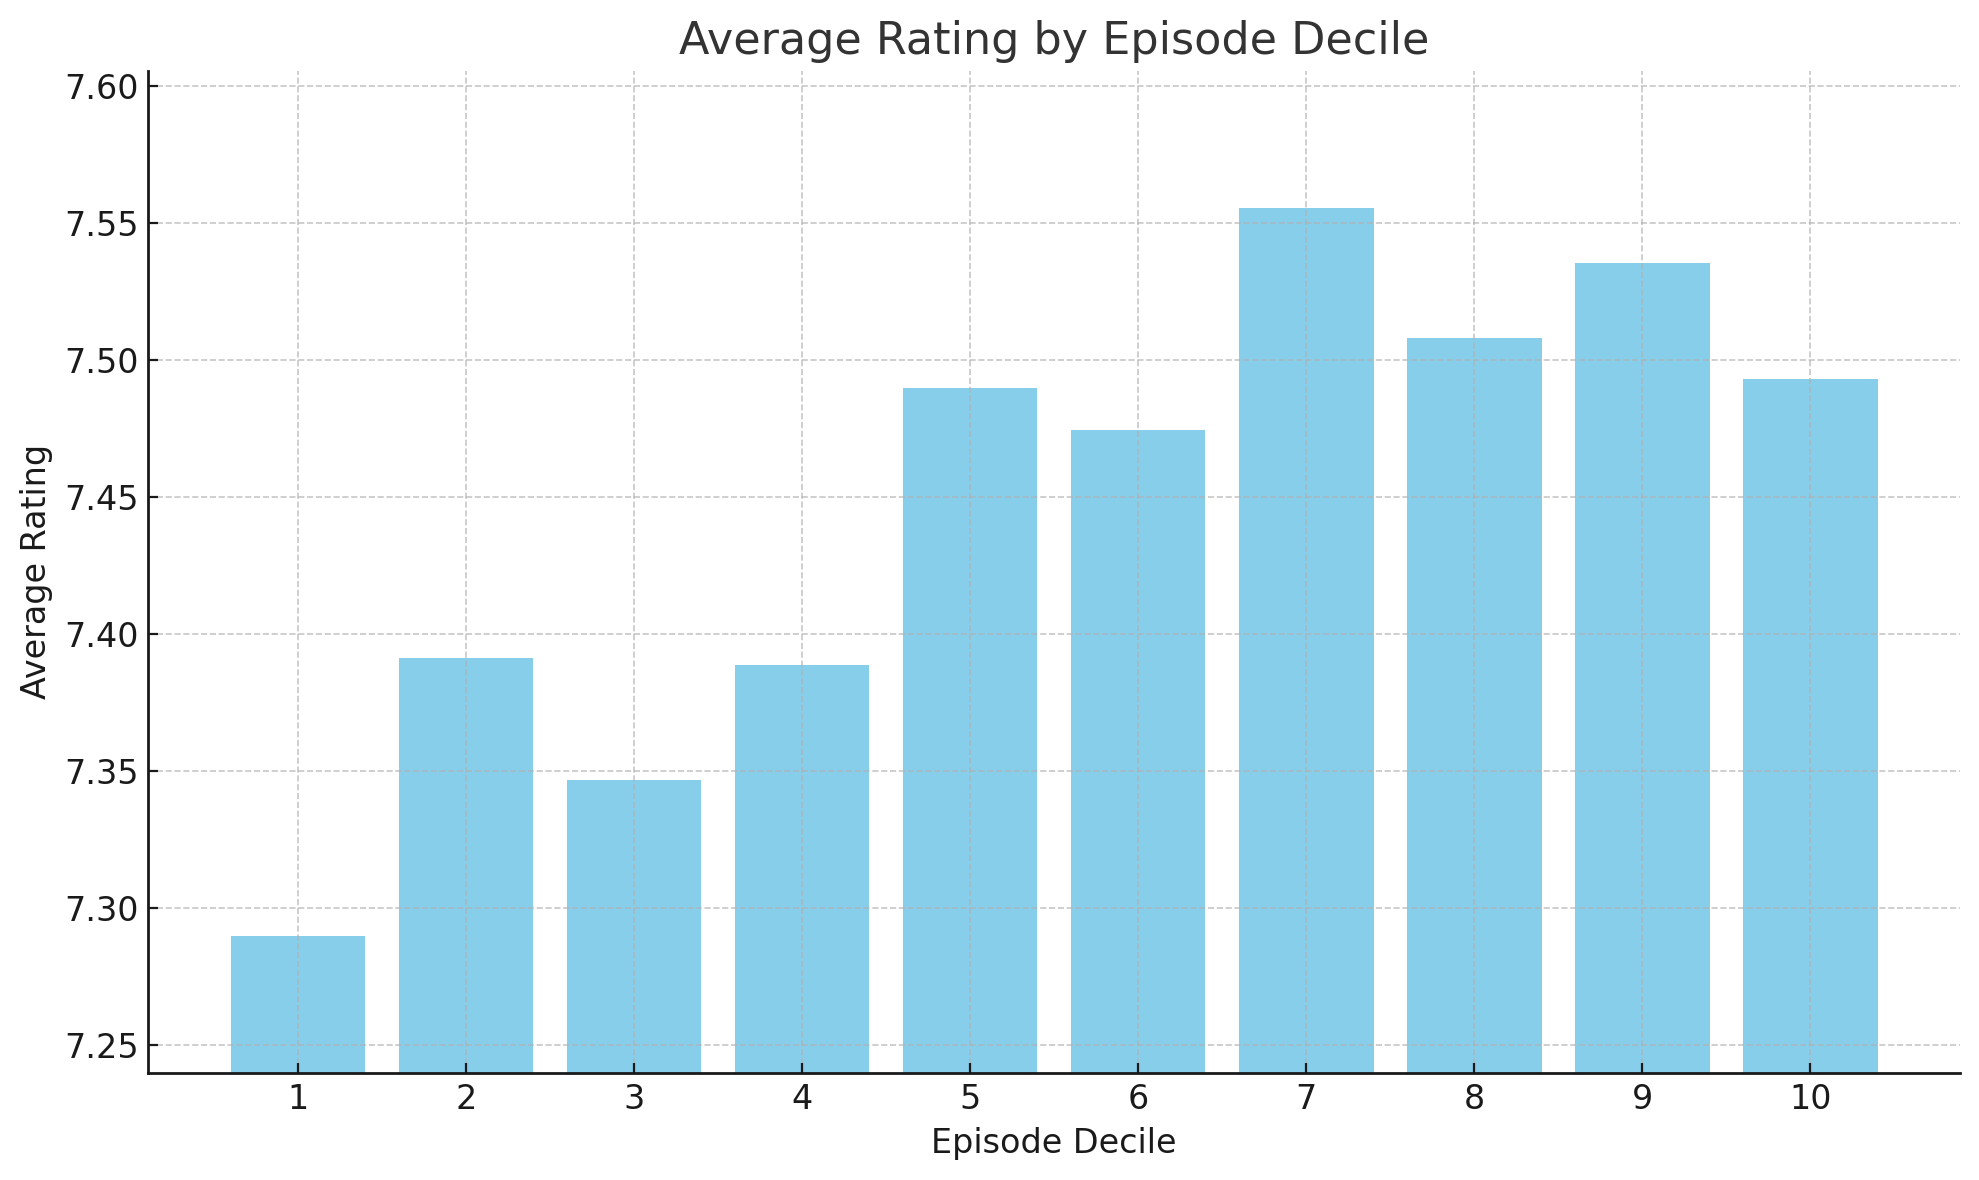

Through this query, we split every TV show into 10 sections to observe the ratings of every section and to find out if there is any pattern to ratings as seasons are released.

This analysis confirms our hypothesis that longevity does not inherently correlate with higher ratings. Therefore, for producers aiming to create a highly-rated TV series should always remember **'quanlity over quantity'**.

It may be smart choice to prioritize maintaining or enhancing the quality rather than simply increasing the overall length of content.


Now, let's explore how ratings varied on TV series from different years.

### 1.4 What is the pattern of average ratings across different decades?

In [ ]:
%%bigquery --project=ba775-b01

# Average Rating trend over decades
SELECT cast(floor(CAST(startYear AS INT)/10) * 10 as int) AS decade, round(avg(averageRating),2) as Average_Rating
FROM `ba775-b01.project_data.basics` as basics
left join `ba775-b01.project_data.ratings_cleaned` as ratings
on basics.tconst = ratings.tconst
where averageRating is not null
group by decade
Order by decade asc;

Query is running:   0%|          |

Downloading:   0%|          |

,decade,Average_Rating
0,1930,6.100000000
1,1940,6.660000000
2,1950,7.440000000
3,1960,7.440000000
4,1970,7.270000000
5,1980,7.190000000
6,1990,6.890000000
7,2000,6.690000000
8,2010,6.920000000
9,2020,6.880000000


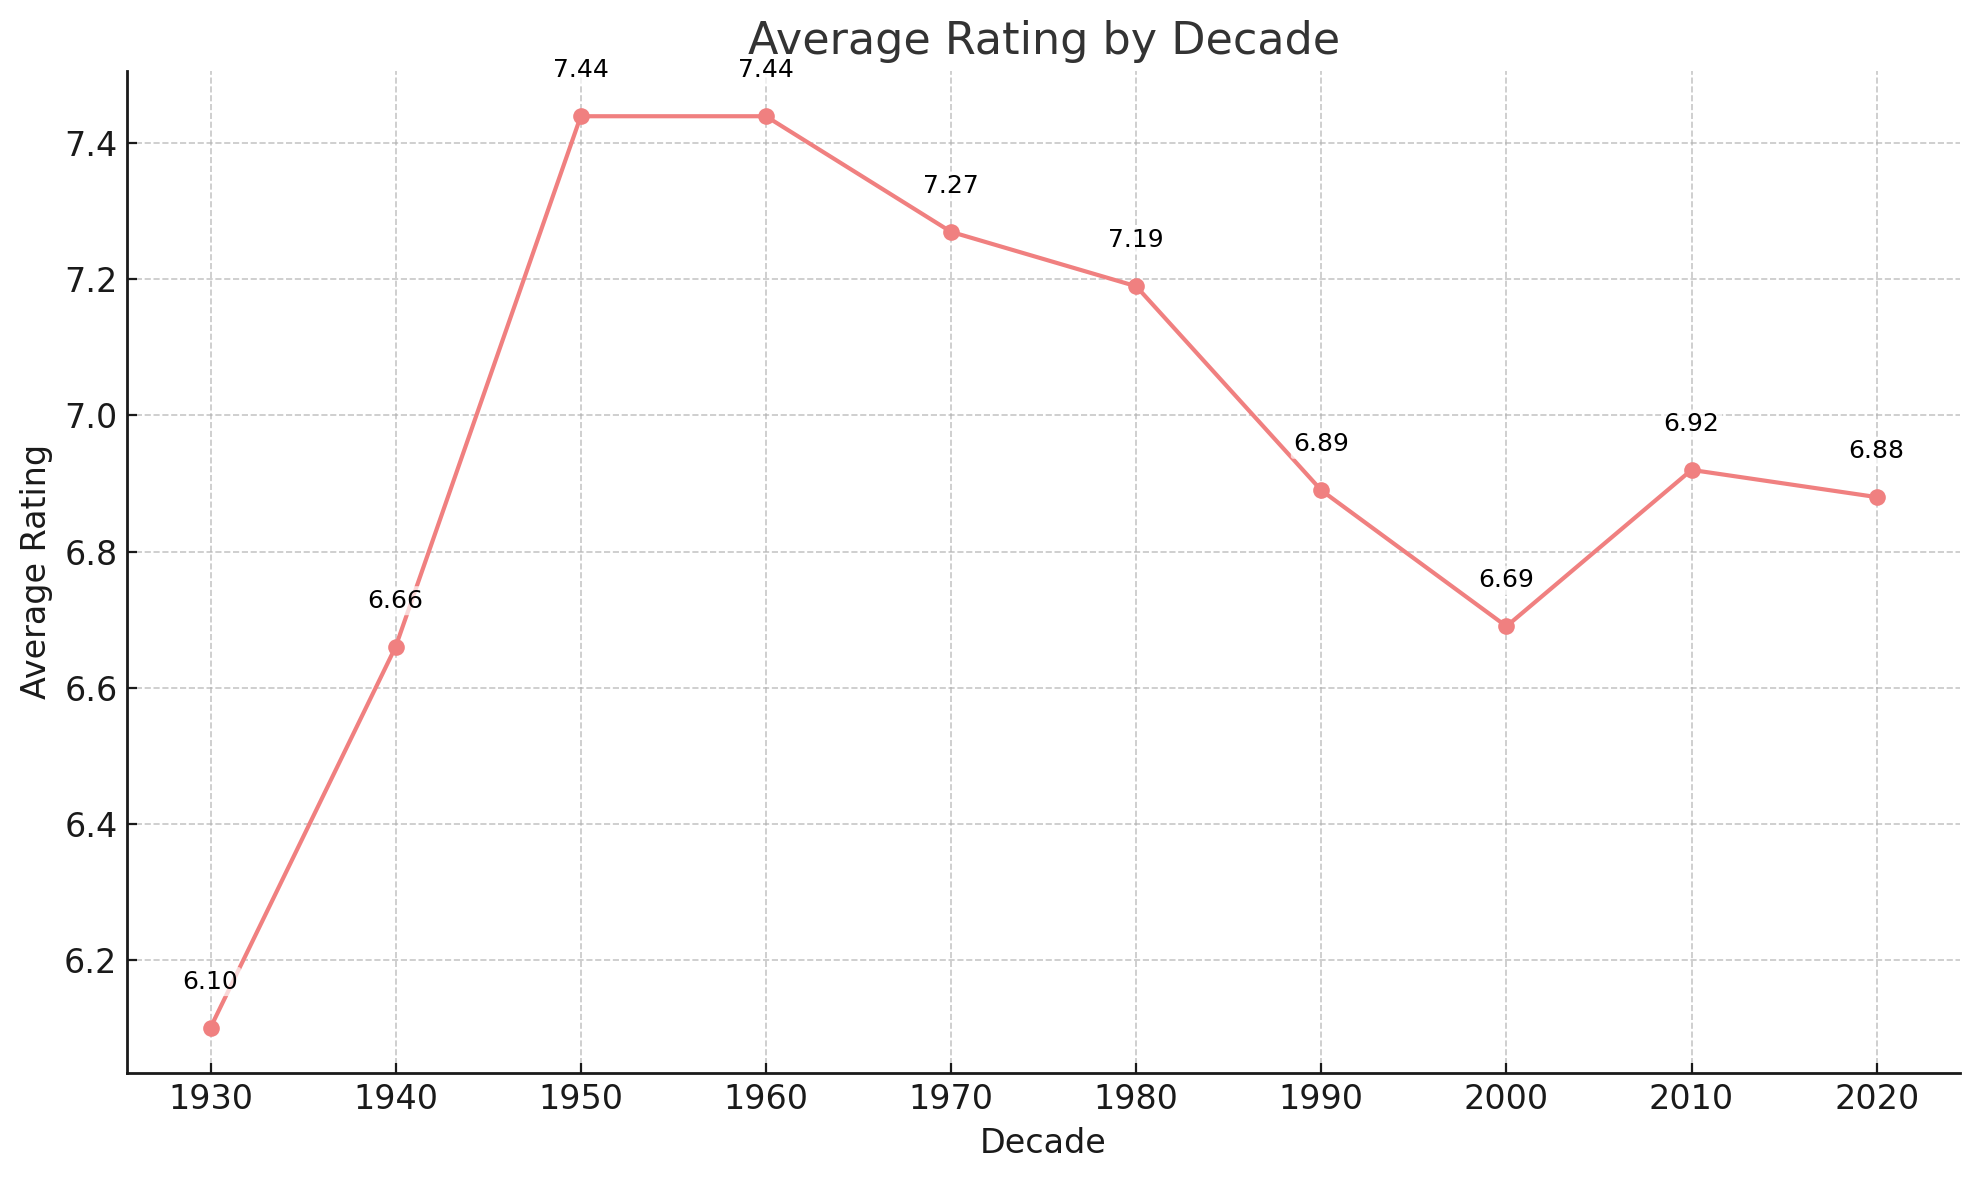

The data shows a fluctuating trend in average TV series ratings over the decades.

The **1950s and 1960s** saw the highest ratings, both at **7.44**, suggesting a golden era for TV series.Ratings dipped slightly in the 1970s and 1980s but remained relatively high.

There's a noticeable decline starting in the 1990s, with the 2000s dropping further, indicating perhaps a critical view of modern tv series or a change in rating behaviors. The 2010s and 2020s show a slight uptick, but not reaching the highs of mid-20th century tv industry. This could reflect evolving audience tastes or increased critical scrutiny in recent years.

Thus, a producer seeking the essential ingredients for on-screen success may find it beneficial to consider TV series from the 1950s to the 1970s as a valuable point of reference.

Understanding the trend of average ratings over the years, we are curious to know if there is any correlation between ratings and the runtime of shows? Further analysis may give us answers.

### 1.5 Does a relationship exist between the average runtime of a show and its ratings?


In [ ]:
%%bigquery

WITH ra as
(SELECT tconst, runtimeMinutes, averageRating
FROM `ba775-b01.project_data.basics_cleaned`
JOIN `ba775-b01.project_data.ratings_cleaned` USING(tconst) )

SELECT
  CASE WHEN runtimeMinutes <= 30 THEN '0-30'
    WHEN runtimeMinutes > 30 AND runtimeMinutes <= 45 THEN '31-45'
    WHEN runtimeMinutes > 45 AND runtimeMinutes <= 60 THEN '46-60'
    WHEN runtimeMinutes > 60 AND runtimeMinutes <= 90 THEN '61-90'
    ELSE '91+'
  END as runtimeGroup,
  ROUND(AVG(averageRating),2) as averageRating
FROM
  ra
GROUP BY
  runtimeGroup
ORDER BY
  runtimeGroup;


Query is running:   0%|          |

Downloading:   0%|          |

,runtimeGroup,averageRating
0,0-30,6.950000000
1,31-45,6.900000000
2,46-60,7.000000000
3,61-90,6.730000000
4,91+,6.900000000


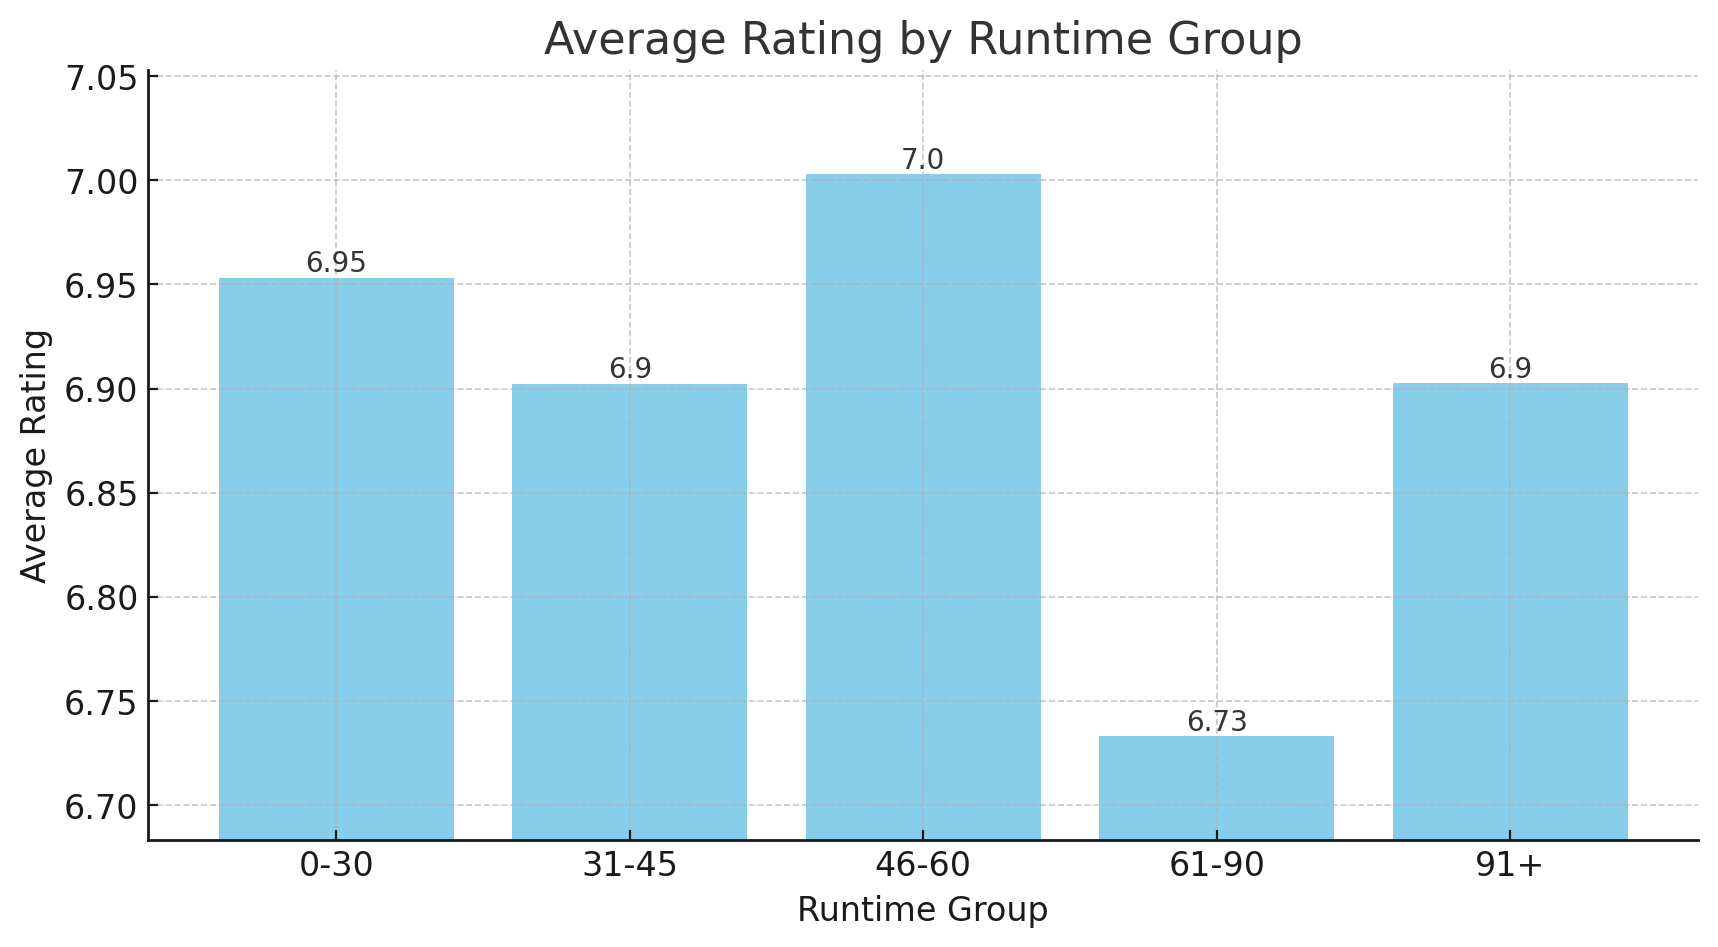

Upon segmenting the runtime into distinct intervals, we observe that episodes with a duration of 46-60 minutes received the most favorable ratings.

This indicates a preference among viewers for series episodes that are neither too short nor excessively long.

On the other hand, episodes lasting 61-90 minutes were rated the lowest, which might imply a dissatisfaction due to their inability to provide either a quick entertainment fix or a full-length cinematic experience, the latter being more characteristic of episodes exceeding 90 minutes.

Therefore, for a producer aiming to create a television series with high ratings, we recommend to set the episode duration to either **under 30 minutes** or **between 45 to 60 minutes**.

### **Summary**

To distill the essence of a high-rating series, we suggest producers consider crafting **single-season** shows or possibly multiple seasons with a keen eye on **maintaining quality**.

Episodes should ideally be concise, under **30 minutes**, or moderately extended, **between 45 to 60 minutes**。

And also, taking cues from the success of the **50s to 70s** era can be a good idea.

This combination of duration, quality, and historical homage could be the formula for a successful TV series in today's diverse entertainment landscape.



---



Next, our focus shifts to assisting producers in choosing the ideal genre. Imagine a producer seeks a genre that resonates with audiences and presents minimal investment risk – what would be their best options? We aim to unveil these insights in our upcoming analysis section.

## 2.Genres

### 2.1 What are the best-performed genres in TV Series industry?

In [ ]:
%%bigquery --project=ba775-b01

SELECT
    genres,
    ROUND(AVG(averageRating),2) AS avgRating,
    COUNT(*) AS totalShows, sum(numVotes) as Total_Votes
FROM
    (SELECT tconst, genres
     FROM `ba775-b01.project_data.basics_cleaned_genres` ) AS basics
JOIN `ba775-b01.project_data.ratings` AS ratings ON basics.tconst = ratings.tconst
JOIN `ba775-b01.project_data.akas` AS akas ON basics.tconst = akas.titleId
GROUP BY genres
ORDER BY Total_Votes DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,genres,avgRating,totalShows,Total_Votes
0,Drama,7.250000000,141794,3488969703.000000000
1,Crime,7.270000000,47978,1442170251.000000000
2,Comedy,7.100000000,95226,1438225693.000000000
3,Action,7.150000000,51519,1257750556.000000000
4,Adventure,7.110000000,50793,1010545144.000000000
5,Mystery,7.250000000,27032,798794799.000000000
6,Romance,7.140000000,33406,498968657.000000000
7,Thriller,7.070000000,15523,484719528.000000000
8,Animation,7.110000000,54710,474468132.000000000
9,Fantasy,7.150000000,19603,466904201.000000000


We rank the result by the total number of votes. Within the popular genres, the genres with relatively high ratings are DRAMA (7.25), CRIME (7.27).

In [ ]:
%%bigquery --project=ba775-b01

SELECT
    genres,
    ROUND(AVG(averageRating),2) AS avgRating,
    COUNT(*) AS totalShows, sum(numVotes) as Total_Votes
FROM
    (SELECT tconst, genres
     FROM `ba775-b01.project_data.basics_cleaned_genres` ) AS basics
JOIN `ba775-b01.project_data.ratings` AS ratings ON basics.tconst = ratings.tconst
JOIN `ba775-b01.project_data.akas` AS akas ON basics.tconst = akas.titleId
GROUP BY genres
ORDER BY avgRating DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,genres,avgRating,totalShows,Total_Votes
0,War,7.770000000,3442,48740131.000000000
1,History,7.540000000,14403,172873705.000000000
2,Western,7.540000000,2149,18756521.000000000
3,Documentary,7.470000000,22102,114616683.000000000
4,Biography,7.460000000,8427,149233029.000000000
5,Sport,7.360000000,3877,39640375.000000000
6,Crime,7.270000000,47978,1442170251.000000000
7,Mystery,7.250000000,27032,798794799.000000000
8,Drama,7.250000000,141794,3488969703.000000000
9,Action,7.150000000,51519,1257750556.000000000


We then sorted them using the average rating for each genre. Genres with higher ratings than Drama (7.25), and Crime (7.27) usually have relatively small audience segments, such as War, Historical, Documentary, and so on. These TV series are relatively higher rated but have a narrower audience.Comedy shows great performance since its total number has exceeded 95,000 but still gets an average rating of 7.1, which is quite impressive,

Therefore, it is recommended to focus on genres such as **Drama, Comedy, Crime** etc., if producers are looking for a critically acclaimed TV series ; or if producers wish to specialize in a particular area, such as war, history, documentary, biography, etc., since these genres may deal with complex or challenging subjects that require a certain level of literacy or education in order to be better understood and appreciated by the viewer.

Similarly, producers may deliberately choose to produce works of high quality, in-depth content and position them as TV series for a specific target audience. Therefore the high ratings of these genres do not mean that these works are of higher quality, but rather that they are in some way more specialized and unique for a specific type of audience.

After exploring the general trends of popular genres, we might question if these patterns vary across different decades. Let's investigate the pattern in each decade separately.

### 2.2 What are the most highly-rated genres in each decade from the 1930s to the 2020s?

In [ ]:
%%bigquery --project=ba775-b01

WITH DecadeGenreRatings AS (
SELECT cast(floor(CAST(startYear AS INT)/10) * 10 as int) AS decade, genres,ROUND(AVG(averageRating), 2) AS Average_Rating, sum(numVotes) as Total_Votes
FROM `ba775-b01.project_data.basics_cleaned_genres` AS basics
JOIN `ba775-b01.project_data.ratings_cleaned` AS ratings
ON basics.tconst = ratings.tconst
GROUP BY decade, genres)

SELECT decade,genres AS MostPopularGenres, Average_Rating
FROM (SELECT *,ROW_NUMBER() OVER (PARTITION BY cast(decade as int) ORDER BY Total_Votes DESC) AS rn
    FROM DecadeGenreRatings) AS Ranked
WHERE rn = 1
ORDER BY decade;

Query is running:   0%|          |

Downloading:   0%|          |

,decade,MostPopularGenres,Average_Rating
0,1930,Drama,7.200000000
1,1940,Western,7.230000000
2,1950,Drama,7.370000000
3,1960,Comedy,7.310000000
4,1970,Comedy,7.100000000
5,1980,Comedy,7.060000000
6,1990,Comedy,6.890000000
7,2000,Drama,6.930000000
8,2010,Drama,7.040000000
9,2020,Drama,6.960000000


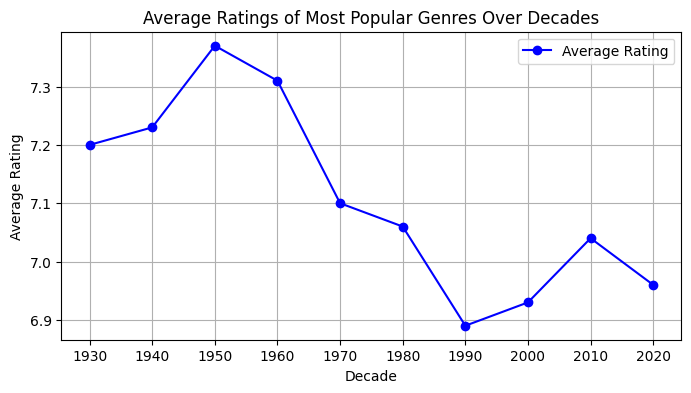

In [ ]:
import matplotlib.pyplot as plt

# Data
decades = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
most_popular_genres = ['Horror', 'Western', 'Drama', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Drama']
average_ratings = [7.2, 7.23, 7.37, 7.31, 7.1, 7.06, 6.89, 6.93, 7.04, 6.96]

# Plotting the line chart
plt.figure(figsize=(8, 4))
plt.plot(decades, average_ratings, marker='o', linestyle='-', color='b', label='Average Rating')
plt.title('Average Ratings of Most Popular Genres Over Decades')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.xticks(decades)
plt.legend()
plt.grid(True)
plt.show()


This analysis shows the most popular genres and their average ratings for each decade from the 1930s-2020s.

It can be seen that **Drama** and **Comedy** have almost always taken turns dominating the hottest genres as time goes on. The audience's love for the most popular genres is seen by the average ratings, and it has been trending downward after peaking in the 1950s. The reason for this may be that some past productions are considered classics and have had a profound effect on later productions. Older works may trigger nostalgic feelings in viewers, relating to their personal experiences, childhood memories, or a specific period in history, so audiences may assign high ratings to these works because of their culturally and artistically unique status.

Next, we would explore about the average number of seasons per genre, offering producers additional insights to help them determine the overall duration of a TV series.

### 2.3 How many seasons each genre has on average?

In [ ]:
%%bigquery --project=ba775-b01

-- How many seasons each genre has on average?
WITH MaxSeasons AS (
  SELECT
    parentTconst,
    MAX(seasonNumber) AS maxSeason
  FROM
    `ba775-b01.project_data.episode`
  GROUP BY
    parentTconst
)

SELECT
  b.genres,
  ROUND(AVG(m.maxSeason),2) AS averageSeasonsNumber,
  COUNT(parentTconst) AS Frequency
FROM
  MaxSeasons AS m
JOIN
  `ba775-b01.project_data.basics_cleaned_genres` AS b
ON
  m.parentTconst = b.tconst
GROUP BY
  b.genres
ORDER BY
  averageSeasonsNumber DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,genres,averageSeasonsNumber,Frequency
0,News,3.67,457
1,Game-Show,3.12,1196
2,Talk-Show,3.02,1746
3,Reality-TV,2.59,1785
4,Family,2.51,3807
5,Music,2.43,1689
6,Sport,2.42,666
7,Documentary,2.41,5692
8,Comedy,2.32,12217
9,Western,2.28,205


The above query displays the average number of seasons across various genres. Genres such as news, game shows, and talk shows have the highest average number of seasons, exceeding three, indicating the enduring popularity and potential for ongoing audience engagement in these genres.

Reality and family shows also have a number of seasons that is above average. Conversely, genres such as adult, history, and war have a lower average, suggesting that series in these categories tend to be shorter or produced less frequently. Producers looking to generate sustained economic returns should consider prioritizing these genres.

Despite its high frequency, the drama genre maintains an average season count of over 1.7. This suggests that the popular category, as previously recommended, continues to receive strong market reception, prompting producers to consider creating subsequent seasons.


Now, given that producers may choose to concentrate on different genres for various regional markets, let's examine the most popular genre within each area.

### 2.4 Which genres are the most popular in each region?

In [ ]:
%%bigquery --project=ba775-b01

WITH region AS
(
SELECT
  a.titleId,
  IF(b.continent IS NULL, b.region, b.continent) continent
FROM `ba775-b01.project_data.akas_cleaned_first` AS a
LEFT JOIN `ba775-b01.project_data.contine_region_mapping` AS b
ON a.region = b.region
WHERE b.region IS NOT NULL
),

genre AS
(
SELECT
  region.titleId,
  region.continent AS continent,
  basic.genres
FROM region
JOIN
  `ba775-b01.project_data.basics_cleaned_genres` AS basic
ON
  region.titleId = basic.tconst
),

rating AS
(
SELECT
  genre.titleId,
  genre.continent AS continent,
  genre.genres,
  r.averageRating
FROM genre
JOIN
  `ba775-b01.project_data.ratings_cleaned` AS r
ON genre.titleId = r.tconst
)


SELECT
  continent_or_region,
  ARRAY_AGG(genre) AS genre,
  ARRAY_AGG(number_of_shows) AS number_of_shows
FROM
(
  SELECT
    rating.continent AS continent_or_region,
    rating.genres AS genre,
    COUNT(*) AS number_of_shows,
    ROW_NUMBER() OVER (PARTITION BY rating.continent ORDER BY COUNT(*) DESC) AS row_num
  FROM
    rating
  GROUP BY
    rating.continent, rating.genres
  ORDER BY
    number_of_shows DESC
)
WHERE row_num <= 5
GROUP BY continent_or_region
ORDER BY continent_or_region;

Query is running:   0%|          |

Downloading:   0%|          |

,continent_or_region,genre,number_of_shows
0,Africa,"[Drama, Comedy, Crime, Action, Adventure]","[4829, 2632, 1783, 1655, 1366]"
1,Americas,"[Drama, Comedy, Animation, Adventure, Action]","[26326, 19904, 11420, 10621, 10457]"
2,Antarctica,"[Family, Comedy, Animation]","[1, 1, 1]"
3,Asia,"[Drama, Comedy, Animation, Action, Adventure]","[34551, 21130, 14281, 13808, 11622]"
4,Europe,"[Drama, Comedy, Crime, Adventure, Animation]","[55796, 35360, 20555, 20433, 19535]"
5,Oceania,"[Drama, Comedy, Crime, Action, Adventure]","[3530, 2480, 1352, 1211, 1209]"
6,SUHH,"[Drama, Comedy, Adventure, Animation, Action]","[489, 439, 363, 286, 236]"
7,XWG,"[Drama, Comedy, Adventure, Crime, Family]","[591, 342, 327, 248, 236]"


Overall, Drama and Comedy are among the top popular genres in most regions, with a slight variation in Antarctica where the sample size is extremely small.

This finding reinforces our conclusion that producers looking for popular genres with a high success rate across most regions should seriously consider Drama and Comedy.

### **Summary**

The analysis suggests that focusing on genres such as **Drama**, **Comedy** and **Crime** is advisable for producers aiming for critically acclaimed TV series, as these genres consistently receive high ratings and have a broader audience base.

However, genres like war, historical, documentary, and biography, with higher ratings than drama and crime, often cater to more specialized and smaller audience segments. These genres may tackle complex or challenging subjects that require a certain level of literacy or education for better understanding. Producers may deliberately choose to create high-quality, in-depth content targeted at specific audiences.

The second part of the analysis explores genre popularity and average ratings from the 1930s to the 2020s. It observes that drama and comedy have consistently dominated as the most popular genres, with audience preferences reflected in average ratings. The decline in average ratings over time may be attributed to the lasting impact of classic productions, triggering nostalgic feelings in viewers and influencing their high ratings due to the cultural and artistic significance of older works.



---



Our analysis of time and genre has equipped us with numerous recommendations for producers. Now, they might be curious about which regions to focus on for an international TV series. We're eager to explore this topic in the following section, examining TV series from a regional perspective. And we hope to provide some truly valuable advice.

## 3.Region

### 3.1 Is there a correlation between the number of regions where a TV series is broadcast and its ratings?

In [ ]:
%%bigquery --project=ba775-b01

WITH akas_ratings AS (
  SELECT akas.titleId AS title_id, ratings.averageRating AS avg_rating, akas.region, akas.types
  FROM `ba775-b01.project_data.akas_cleaned_first` AS akas
  LEFT JOIN ba775-b01.project_data.ratings_cleaned AS ratings
  ON ratings.tconst = akas.titleId
  WHERE akas.region IS NOT NULL AND ratings.averageRating IS NOT NULL
)

-- Calculate the average of average ratings for TV series grouped by the same count of distinct regions
SELECT sub.count_region, ROUND(AVG(sub.avg_rating),2) AS avg_rating_grouped
FROM (
  SELECT
    COUNT(DISTINCT region) AS count_region,
    AVG(avg_rating) AS avg_rating
  FROM akas_ratings
  GROUP BY title_id
) AS sub
GROUP BY sub.count_region
ORDER BY avg_rating_grouped DESC, sub.count_region DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,count_region,avg_rating_grouped
0,69,9.200000000
1,59,7.690000000
2,64,7.620000000
3,83,7.600000000
4,86,7.500000000
5,66,7.500000000
6,58,7.500000000
7,63,7.490000000
8,56,7.420000000
9,61,7.410000000


The correlation between number of regions and average rating indicates a moderately positive relationship between a TV series' ratings and the breadth of its broadcast. This suggests that series with higher ratings are more likely to be shown in numerous regions, reflecting a preference for quality. **Generally, airing a TV series across a wider region could potentially improve its ratings.**

However, this can also be viewed from a different perspective. High-quality TV series often earn the chance to be broadcast in multiple regions due to positive feedback. For producers, distributing a TV series in various areas can create an impression of high quality among the audience, serving as a strategy to boost the series' performance.

As we advise producers to broadcast TV series across multiple regions, it would be beneficial to further investigate any potential rating biases associated with these regions.

### 3.2 Whether there is rating bias in different regions?

In [ ]:
%%bigquery --project=ba775-b01

WITH region AS
(
SELECT
  IF(b.continent IS NULL, b.region, b.continent) continent,
  a.titleId,
FROM `ba775-b01.project_data.akas_cleaned_first` AS a
LEFT JOIN `ba775-b01.project_data.contine_region_mapping` AS b
ON a.region = b.region
WHERE b.region IS NOT NULL
)


SELECT
  region.continent AS continent_or_region,
  ROUND(AVG(r.averageRating),2) AS average_top_rating,
  COUNT(*) AS number_of_shows
FROM
  region
JOIN
  `ba775-b01.project_data.ratings_cleaned` AS r
ON region.titleId = r.tconst
GROUP BY
  region.continent
ORDER BY
  average_top_rating DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,continent_or_region,average_top_rating,number_of_shows
0,Antarctica,7.300000000,11
1,Asia,6.740000000,682645
2,Europe,6.600000000,1912928
3,Americas,6.570000000,954857
4,Africa,6.540000000,42916
5,Oceania,6.500000000,79180
6,SUHH,6.500000000,32178
7,XWG,6.330000000,35884


The data presented in the table suggests a potential misalignment between the TV shows currently aired in certain regions and the preferences of the local audience, reflected by varying average ratings.

Despite having the smallest number of shows, Antarctica demonstrates an exceptionally high average rating of 7.3, indicating the content resonates well with its audience. In contrast, continents with a vast number of shows like Asia and Europe have slightly lower average ratings, which could signal a mismatch between viewer preferences and the shows offered.

The Americas, Africa, and Oceania present a spectrum of average ratings, which may warrant a closer look to understand regional tastes.

Interestingly, the historical entities "SUHH" and "XWG," with modest show counts and lower average ratings, underscore the importance of tailoring content to the cultural and historical context of the audience.

This data can be a valuable guide for TV producers to **fine-tune their programming to better align with the diverse tastes** of viewers across different regions, an issue we plan to investigate further.

Considering that higher-rated TV series tend to be aired in more regions, our focus shifts to examining the correlation between language and TV series ratings. We aim to explore which languages typically yield higher-rated TV series and delve into regional specifics, investigating which languages, on average, garner higher ratings within each distinct region. To begin, our initial step involves conducting a comprehensive overview of the quantity of TV series available in each language.

### 3.3 Which language has the most TV Series being translated in?

In [ ]:
%%bigquery --project=ba775-b01

Select DISTINCT language AS language, COUNT(titleId) AS number_of_series
FROM `ba775-b01.project_data.akas_cleaned_first`
WHERE language != r'\N'
GROUP BY language
ORDER BY number_of_series DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,language,number_of_series
0,ja,4389662
1,fr,4359333
2,hi,4325682
3,de,4292495
4,es,4291624
5,it,4290820
6,pt,4290674
7,en,313474
8,tr,36547
9,ru,35891


Japanese stands out as the language with the highest count of translated or produced TV series, closely followed by French and Hindi. Among the top 10 languages, the majority originate from Western countries—French, German, Spanish, and Italian, each boasting over 4 million aired TV shows in their respective languages. Notably, the top 10 list predominantly features Western languages, while only three languages from Asian or mid-Asian countries, namely Japanese, Hindi, and Turkish, secure a position. This trend suggests that nations like France, Germany, and Italy exhibit a substantial interest in TV series consumption worldwide, as evidenced by the considerable volume of translated TV series available in their native languages.

Having gained a comprehensive understanding of the distribution of TV series across various languages, our next step involves delving deeper into exploring the correlation between languages and their corresponding ratings.

### 3.4 What language of TV Series usually have higher average ratings?

In [ ]:
%%bigquery --project=ba775-b01

WITH lang AS (Select a.*, averageRating
FROM `ba775-b01.project_data.akas_cleaned_first` AS a
LEFT JOIN `ba775-b01.project_data.ratings_cleaned` AS b
ON a.titleId = b.tconst
WHERE language != r'\N'
  AND averageRating IS NOT NULL
ORDER BY titleId)
SELECT language, ROUND(AVG(averageRating),4) AS avg_rating, COUNT(DISTINCT titleId) AS no_of_series
FROM lang
GROUP BY language
HAVING COUNT(DISTINCT titleId) > 100
ORDER BY avg_rating DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,language,avg_rating,no_of_series
0,pt,7.403800000,83842
1,it,7.403000000,83952
2,es,7.395500000,84555
3,de,7.391600000,84981
4,mr,7.328800000,128
5,hi,7.159600000,115243
6,bn,7.024400000,284
7,sk,6.973000000,487
8,ja,6.965400000,150734
9,fr,6.930400000,141342


The findings indicate that Portuguese tops the chart for TV series languages with the highest average ratings, closely followed by Italian and Spanish. Interestingly, these languages also rank within the top 10 languages with the most translated TV series. This correlation suggests that TV series produced or translated into these languages often exhibit higher quality, potentially leading to better ratings. Alternatively, it's plausible that audiences in these language-speaking regions are more inclined to give favorable ratings, contributing to these languages consistently receiving higher average ratings.

Having identified languages associated with higher ratings, it's pertinent to recognize that different countries have diverse language preferences. To conduct a more targeted analysis, our focus shifts to exploring, within each region or country, which specific languages among TV series tend to garner higher ratings.

### 3.5 Within each region which language of TV Series will have higher ratings

In [ ]:
%%bigquery --project=ba775-b01

WITH region_lang AS
(WITH lang AS (Select a.*, averageRating
FROM `ba775-b01.project_data.akas_cleaned_first` AS a
LEFT JOIN `ba775-b01.project_data.ratings_cleaned` AS b
ON a.titleId = b.tconst
WHERE language != r'\N'
  AND averageRating IS NOT NULL
ORDER BY titleId)
SELECT region, language, AVG(averageRating) AS avg_rating, COUNT(DISTINCT titleId) AS num
FROM lang
GROUP BY region, language
HAVING num > 10
ORDER BY avg_rating DESC)

SELECT region,
       ARRAY_AGG(language)[OFFSET(0)] AS language,
       ARRAY_AGG(ROUND(avg_rating,4))[OFFSET(0)] AS average_rating
FROM region_lang
GROUP BY region
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,region,language,average_rating
0,IN,gu,7.469500000
1,PT,pt,7.404700000
2,IT,it,7.404300000
3,DE,de,7.404300000
4,ES,es,7.403900000
5,FR,fr,7.403800000
6,SE,sv,7.362500000
7,TN,fr,7.362500000
8,SUHH,lt,7.351800000
9,DZ,fr,7.247100000


The analysis reveals that in most countries, the highest-rated language for TV series aligns with either the official language or the most widely spoken language within that region—like Portuguese in Portugal or Italian in Italy. However, there are exceptions, such as in India where Gujarati, the third most spoken language, dominates the ratings, or in Tunisia where French surpasses the official language of Arabic in popularity for TV series. This suggests that while the trend generally follows the official or primary spoken language, unique instances exist. As a result, comprehensive research is essential to accurately target specific audiences, thereby increasing the likelihood of achieving higher ratings.

This leads us to our final exploration for this session: delving into the types of TV series that undergo the highest number of language translations. This investigation aims to shed light on the kinds of TV series that could potentially resonate and become popular among diverse language-speaking countries and audiences.

### 3.6 What are the top 10 TV Series that has the highest number of different language version?

In [ ]:
%%bigquery --project=ba775-b01

Select primaryTitle, COUNT(DISTINCT language) AS number_of_language, averageRating, genres
FROM `ba775-b01.project_data.akas_cleaned_first` AS a
LEFT JOIN `ba775-b01.project_data.basics_cleaned` AS b
ON a.titleId = b.tconst
LEFT JOIN `ba775-b01.project_data.ratings_cleaned`
USING (tconst)
WHERE language != r'\N' AND primaryTitle != r'\N'
GROUP BY primaryTitle, averageRating, genres
ORDER BY number_of_language DESC, averageRating DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,primaryTitle,number_of_language,averageRating,genres
0,Among Us Logic,14,7.400000000,"Animation,Comedy,Mystery"
1,Teenage Mutant Ninja Turtles,12,7.900000000,"Action,Adventure,Animation"
2,Sailor Moon,12,7.700000000,"Action,Adventure,Animation"
3,My Little Pony: Friendship Is Magic,12,7.700000000,"Adventure,Animation,Comedy"
4,PJ Masks,12,5.300000000,"Action,Adventure,Animation"
5,Invader ZIM,11,8.400000000,"Action,Adventure,Animation"
6,The Smurfs,11,7.200000000,"Adventure,Animation,Comedy"
7,The Casagrandes,11,5.800000000,"Adventure,Animation,Comedy"
8,Breaking Bad,10,9.500000000,"Crime,Drama,Thriller"
9,Friends,10,8.900000000,"Comedy,Romance"


The findings indicate that among the top 10 TV series with the most translated language versions, the majority belong to the genres of animation and comedy, with the exception of one thriller. This suggests that animation and comedy genres possess a more universal appeal, catering to a broader range of audience tastes. For producers aiming to capture a larger global audience, focusing on these two genres of TV series could prove to be beneficial.

### **Summary**

All in all, from these regional analyses above. We can see that the correlation between a TV show's ratings and the number of regions it is broadcast in is modest, suggesting that higher-rated shows are generally shown in more regions. This can be applied as a strategy for producers to give the audience impression of high-quality.

Concerning languages versions, we found that most TV series originate from Western countries, with exceptions like Japanese and Hindi. This trend reflects substantial global interest in TV series consumption from nations like France and Italy, evident in the abundance of series available in their native languages. These languages also tend to boast the highest average ratings, indicating higher quality or a predisposition among audiences in these regions to give favorable ratings.

Interestingly, in most countries, the top-rated TV series align with either the official or widely spoken language, though exceptions exist. This underscores the need for detailed research to effectively target specific regional audiences for higher ratings. Additionally, findings reveal that animation and comedy, being universally engaging, have more language versions, offering broader appeal across diverse audience tastes. For producers eyeing a larger global audience, focusing on these genres could yield significant benefits.

Overall, producers can use this data to better align their content with diverse audience tastes to maximize viewership and revenue. Further research is needed to understand the intricacies of this relationship fully.



---



Up to this point, we have analyzed various aspects of a TV series. However, it's crucial to acknowledge that the people involved in a TV series play a significant role in its success. In the next section, we will dive into the topic that how the crew can influence the success of a TV series.

## 4.Crew

### 4.1 What kind of personnel are required to film TV series?

To learn about the relationship of the crew members and the ratings of TV series, we must first discover the essential personnel in making a TV series. We divided all the crew mambers into 10 groups: Writer, Director, Producer, Actor/Actress,Sound/Music, Visual/Editor, Stage Decor/Makeup, Support,Filming and others.

In [ ]:
%%bigquery --project=ba775-b01

SELECT
  CASE
    WHEN primaryProfession IN ('writer', 'script_department') THEN 'Writer'
    WHEN primaryProfession IN ('director', 'assistant_director', 'casting_director') THEN 'Director'
    WHEN primaryProfession IN ('producer', 'production_manager', 'manager') THEN 'Producer'
    WHEN primaryProfession IN ('actor', 'actress') THEN 'Actor/Actress'
    WHEN primaryProfession IN ('soundtrack', 'composer', 'music_department', 'sound_department', 'music_artist') THEN 'Sound/Music'
    WHEN primaryProfession IN ('production_designer', 'visual_effects', 'special_effects', 'animation_department', 'editor') THEN 'Visual/Editor'
    WHEN primaryProfession IN ('art_director', 'make_up_department', 'set_decorator', 'art_department', 'stunts', 'costume_department', 'costume_designer') THEN 'Stage_Decor/Makeup'
    WHEN primaryProfession IN ('publicist', 'executive', 'legal', 'talent_agent', 'assistant', 'podcaster', 'location_management', 'casting_department', 'transportation_department', 'editorial_department') THEN 'Support'
    WHEN primaryProfession IN ('camera_department', 'cinematographer') THEN 'Filming'
    ELSE 'Others'
  END AS staff_classification,
  COUNT(*) AS frequency
FROM `ba775-b01.project_data.name_cleaned_primaryProfession`
GROUP BY staff_classification
ORDER BY frequency DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,staff_classification,frequency
0,Actor/Actress,115952
1,Sound/Music,43358
2,Writer,42901
3,Director,26691
4,Producer,19838
5,Others,16474
6,Stage_Decor/Makeup,12295
7,Filming,10699
8,Visual/Editor,8649
9,Support,2960


Notably, the highest frequency is attributed to the "actor/actress" role, indicating the presence of a large number of performers in the dataset. It means that for most TV series, the majority of the crew are made up of **actors and actresses**.

The prominence of the "Sound/Music" and "Writer" categories highlights the importance of audio and narrative elements in the industry, with a considerable number of professionals dedicated to sound engineering, music and writing roles. Less personnel are needed in categories such as "Support" and "Visual/Editor" suggest that roles related to support functions or post-production aspects may be less common or more specialized.

With this knowledge, investors and producers should put devote more time into the **casting**, finding suitable **musicions**, and **writers**. It is not because they are more important, but more of them are needed on set. Hence it makes sense to devote more on those classifications to obtain equally high quality crew members.

While actors/actresses, musicians, and writers form the backbone of a production, it is the **directors** who orchestrate these elements into a cohesion. They are crutial in shaping the narrative and guiding the performances despite them being less numerous. Directors singlehandedly influence the ratings of TV series through their every decision. By studying the the best directors throughout the decades, we could gain insights in creating contents that are more likely to receive high ratings and critical acclaim.

It is widely recognized that directors and actors/actresses play a key role in a show's success and constitute a significant portion of the crew composition. In the upcoming two queries, we will focus on examining the impact of directors and actors/actresses on the success of a screen production.

### 4.2 Who are the directors that have created the highest-rated TV series from every decade?

In [ ]:
%%bigquery --project=ba775-b01

# Most highly-rated directors over decades
WITH DecadeData AS (
    SELECT
        CAST(FLOOR(CAST(startYear AS INT) / 10) * 10 AS INT64) AS Decade,
        basics.tconst,
        directors,
        averageRating
    FROM
        `ba775-b01.project_data.basics_cleaned` AS basics
        JOIN `ba775-b01.project_data.crew_cleaned` AS crew ON basics.tconst = crew.tconst
        JOIN `ba775-b01.project_data.ratings_cleaned` AS ratings ON basics.tconst = ratings.tconst
), RankedDirectors AS (
    SELECT
        Decade,
        directors,
        AVG(averageRating) AS Average_Rating,
        RANK() OVER (PARTITION BY Decade ORDER BY AVG(averageRating) DESC) AS RatingRank
    FROM
        DecadeData
    GROUP BY
        Decade,
        directors
), DecadeRatingData AS (
    SELECT
        Decade,
        name.primaryName AS Director,
        Average_Rating
    FROM
        RankedDirectors
    JOIN
        `ba775-b01.project_data.name_cleaned` AS name ON name.nconst = RankedDirectors.directors
)

SELECT
    drd.Decade,
    drd.Director,
    drd.Average_Rating

FROM
    DecadeRatingData drd
JOIN (
    SELECT
        Decade,
        MAX(Average_Rating) AS MaxRating
    FROM
        DecadeRatingData
    GROUP BY
        Decade
) AS MaxRatings ON drd.Decade = MaxRatings.Decade AND drd.Average_Rating = MaxRatings.MaxRating
ORDER BY
    drd.Decade,
    drd.Average_Rating DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Decade,Director,Average_Rating
0,1940,George Cahan,7.300000000
1,1950,Alan Bromly,9.400000000
2,1960,Dicky Leeman,9.800000000
3,1970,Erik Balling,9.300000000
4,1970,Alan J.W. Bell,9.300000000
5,1980,Dimitar Petrov,9.100000000
6,1990,Slaheddine Essid,9.300000000
7,2000,Zaza Urushadze,9.400000000
8,2010,Hatem Ali,8.550000000
9,2020,Marcell Jankovics,8.100000000


The data indicates that directors from the 1950s through to the 2000s have exceptionally high average ratings. Ratings for directors in the 2010s and 2020s show a decline, suggesting that directors from mid-late 20th century are rated more favorably than contemporary directors, or that the rating criteria have become stricter over time.

The result also suggests that directors who received the highest ratings may have tapped into the prevailing sentiments and narratives of their time, and know the preferences of their audiences. To achieve high ratings for future TV series, producers should investigate each directors and dive into their era to determine the correlation between a director's vision and the cultural spirit of their time, and find ones that could achieve the same.

To understand the key to the sucess of TV series, it is important to evaluate other crew members, and identify trends or qualities that contribute to success. To begin with, we will explore the actors and actresses that have been in the highest rated productions.

### 4.3 Who are the actors/actresses with the highest average ratings and what do they have in common?


In [ ]:
%%bigquery
SELECT
    primaryName,
    AVG(averageRating) as avg_rating,
    COUNT(*) as number_of_roles
FROM
    `ba775-b01.project_data.career_trajectory`
WHERE
    category IN ('actor', 'actress')  -- Assuming 'category' indicates the role
GROUP BY
    primaryName
ORDER BY
    avg_rating DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,primaryName,avg_rating,number_of_roles
0,Dave Dedrick,9.800000000,1
1,Sudhir Joshi,9.700000000,1
2,Rasika Joshi,9.700000000,1
3,Rekha Kamat,9.700000000,1
4,Marvin Kane,9.600000000,1
5,Ena Moon,9.600000000,1
6,Azra Sherwani,9.500000000,1
7,Marlon Brando,9.500000000,1
8,Salim Nasir,9.500000000,1
9,David Reynoso,9.500000000,1


It is interesting that all of them have only been in one production, but maybe it was this dedication and focus, allowed them to contribute to the high rated TV series. Producers should look into actors/actresses that are willing to commit to one project and tend to be more selective with their roles. Casts do not necessary have to have tremendous amount of experience, as long as they are the perfect fit for the role, and that they can generate memorable performance.

With this result, we are curious, to achieve high review, should crew members really on only one production? Is quality really over quantity?

### 4.4 Who are the most active people in TV industry and how is the quality of their productions?

In [ ]:
%%bigquery --project=ba775-b01
SELECT
    primaryName,
    COUNT(*) AS occurrences,
    ROUND(AVG(averageRating),2) AS avg_rating,
    (MAX(startYear) - (MIN(startYear))) AS career_length
FROM
    `ba775-b01.project_data.career_trajectory`
GROUP BY
    primaryName
ORDER BY
    occurrences DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,primaryName,occurrences,avg_rating,career_length
0,Don Messick,92,6.760000000,36
1,John Stephenson,63,6.790000000,41
2,Hal Smith,52,6.960000000,36
3,Daws Butler,46,6.890000000,41
4,Mel Blanc,44,7.020000000,46
5,Janet Waldo,41,6.720000000,31
6,June Foray,38,7.320000000,48
7,Ichirô Nagai,38,7.420000000,39
8,Betty White,35,7.040000000,65
9,Lennie Weinrib,33,6.800000000,23


The query displays the 10 people who have participated in the creation of productions the most. For these 10 individuals, the average ratings of their production is below average despite their efforts and their lifelong dedication to the industry. This answers our previous question, quality is indeed over quantity.

When hiring crew members for a TV series, it would be a good idea to learn about the amount of productions they are involved in since our data indicates more work means lower quality. Furthermore, sometimes the previous roles played by actors or actresses were too memerable and that role has become a part of the actor/actress. It may be hard for audiences to oversee their previous character, which may ruin the new character and the viewing experience of the audience.

Nevertheless, it is possible that these people did not find the right person to collaborate with, and caused them fail to utilize their talents to the fullest. Next, we will dive into the collaborations between individuals and find out if two people are more familar with each other, would they create better TV series.

### 4.5 Which pairs of individuals have collaborated most frequently and what are the outcomes of their collaborations?


In [ ]:
%%bigquery --project=ba775-b01

SELECT
    person_1,
    person_2,
    ROUND(AVG(averageRating),2) as avg_rating,
    COUNT(DISTINCT tconst) as num_of_collab,
    MAX(startYear) - MIN(startYear) as collab_length_yrs
FROM (
    SELECT
        nb1.primaryName as person_1,
        nb2.primaryName as person_2,
        tr.averageRating,
        t.tconst,
        t.startYear
    FROM
        `ba775-b01.project_data.principals` p1
    JOIN
        `ba775-b01.project_data.principals` p2 ON p1.tconst = p2.tconst AND p1.nconst < p2.nconst
    JOIN `ba775-b01.project_data.name` nb1 ON p1.nconst = nb1.nconst
    JOIN `ba775-b01.project_data.name` nb2 ON p2.nconst = nb2.nconst
    JOIN `ba775-b01.project_data.basics` t ON p1.tconst = t.tconst
    LEFT JOIN `ba775-b01.project_data.ratings_cleaned` tr ON p1.tconst = tr.tconst
)
GROUP BY
    person_1, person_2
ORDER BY
    num_of_collab DESC, person_1, person_2
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,person_1,person_2,avg_rating,num_of_collab,collab_length_yrs
0,Don Messick,John Stephenson,6.850000000,36,31
1,Daws Butler,Don Messick,6.720000000,27,28
2,Don Messick,Jean Vander Pyl,6.630000000,25,21
3,Don Messick,Hal Smith,6.740000000,21,19
4,Don Messick,Janet Waldo,6.630000000,21,21
5,John Stephenson,Janet Waldo,6.690000000,18,19
6,Mel Blanc,Don Messick,6.620000000,18,21
7,Don Messick,Doug Young,6.600000000,17,8
8,Hal Smith,John Stephenson,6.660000000,17,23
9,Joseph Barbera,William Hanna,6.920000000,17,43


We discovered that **Don Messick** has the highest collaboration count and with a significant amount of people, it is not at all surprising since he has completed the greatest amount of work. Apparently, more frequent collaboration does not mean that they could do better together. A possible explanation to our observation is that the long-term collaboration created a comfort zone for them, and they prefer to stay in the zone despite the possible decline in the quality, innovation, and passion.

Beyond the pivotal roles of directors and actors/actresses in the success of a TV series, the number of individuals involved in its production plays a crucial role. As precise data on the exact number of people involved in each TV series isn't available, we approximate it using the count of principals, the leaders in the production group. We anticipate that larger production groups would require more principals overseeing the production. This query aims to delve deeper into the relationship between the number of principals and TV series production.

### 4.6 What are the maximum and minimum number of principals involve in production?

In [ ]:
%%bigquery --project=ba775-b01

--MIN VS MAX number of principals
SELECT MAX(num) AS max_number_of_principals, MIN(num) AS min_number_of_principals
FROM (SELECT tconst, COUNT(nconst) AS num
FROM `ba775-b01.project_data.principals_cleaned`
GROUP BY tconst)

Query is running:   0%|          |

Downloading:   0%|          |

,max_number_of_principals,min_number_of_principals
0,10,1


Firstly, we examine the range of principals required for each TV show. Typically, each series features a maximum of around 10 principals, setting a cap on the individuals holding principal roles within a production group. Irrespective of the overall crew size, the count of principals remains limited to 10. On the opposite end, some TV series have as few as 1 principal.

Having identified the approximate range of principals for each TV show, a pertinent question arises: how many individuals should be employed for producing various TV series genres? For genres like family and comedy, where there's less demand for extensive props or visual effects, the crew size might be smaller. However, genres like thriller or mystery often demand larger teams due to their intricate production needs. Therefore, gaining insights into the average number of principals in each genre could provide valuable guidance on determining the ideal team size required for filming TV shows within the relevant genres.

### 4.7 What is the average number of principals needed for each genre?

In [ ]:
%%bigquery --project=ba775-b01

-- number of principals per genre
WITH number_of_principals AS
(SELECT tconst, COUNT(nconst) AS num
FROM `ba775-b01.project_data.principals_cleaned`
GROUP BY tconst)

SELECT genres, ROUND(AVG(num),2) AS no_of_principals
FROM number_of_principals AS p
LEFT JOIN `ba775-b01.project_data.basics_cleaned_genres` as g
USING (tconst)
WHERE genres IS NOT NULL AND genres != r'\N'
GROUP BY genres
ORDER BY no_of_principals

Query is running:   0%|          |

Downloading:   0%|          |

,genres,no_of_principals
0,Adult,5.52
1,Short,5.56
2,Documentary,5.71
3,News,6.34
4,Reality-TV,6.39
5,Game-Show,6.51
6,Sport,7.00
7,Talk-Show,7.03
8,Family,7.55
9,Music,7.87


Next, we explore the variance in the number of principals across different genres. The top 10 genres requiring fewer principals, such as Adult, Short, Documentary, and Reality-TV, typically involve minimal backend production, costume, or special effects editing. This may explain why they require fewer principals overseeing the production. Conversely, genres such as Crime, Western, and Thriller demand more principals as they often involve extensive crews for prop and costume production, along with diverse visual effects. This approach offers valuable insights as we utilize the count of principals as a proxy to estimate the size of the production group. Understanding the production group size emerges as another critical factor contributing to the success of TV series.

Apart from investigating the number of principals and size of production team needed for producing each genre of TV series, it is also important

### 4.8 Does the number of principals involved affect the average rating of TV series?


In [ ]:
%%bigquery --project=ba775-b01

-- rating vs human capital investment
WITH number_of_principals AS(
SELECT p.tconst, COUNT(p.nconst) AS num, r.averageRating AS rating
FROM `ba775-b01.project_data.principals_cleaned` AS p
LEFT JOIN `ba775-b01.project_data.ratings_cleaned` AS r
ON p.tconst = r.tconst
WHERE r.averageRating IS NOT NULL
GROUP BY p.tconst, r.averageRating)

SELECT num, ROUND(AVG(rating),2) AS avg_rating
FROM number_of_principals
GROUP BY num
ORDER BY avg_rating DESC

Query is running:   0%|          |

Downloading:   0%|          |

,num,avg_rating
0,3,7.130000000
1,4,7.110000000
2,2,7.080000000
3,5,7.050000000
4,6,7.000000000
5,1,6.970000000
6,10,6.950000000
7,7,6.940000000
8,8,6.880000000
9,9,6.810000000


Lastly, considering the number of principals as a proxy for the production group size, we aim to understand its impact on a TV series' ratings. Initially, we hypothesized that a higher count of principals within a larger production group would lead to higher ratings due to increased efforts. However, our findings revealed an unexpected trend: TV series achieved the highest average ratings when involving approximately 3-4 principals, representing a middle to small-sized production team. Conversely, as the count of principals increased, specifically reaching 7-10 individuals in larger production groups, the ratings showed a declining trend.

These findings suggest an optimal range of around 3-4 principals, indicating that middle to small-sized production groups tend to achieve higher ratings. Conversely, larger production groups with more principals appear to correlate with decreased ratings.

Having established the average number of principals required for each genre and the average ratings associated with varying production group sizes, our objective now is to determine the optimal number of principals needed for each genre to achieve the highest ratings.

### 4.9 What is the optimal number of principals involved for each genre that has highest rating?

In [ ]:
%%bigquery --project=ba775-b01

-- Number of principals for each genres that gives the highest average rating
With aggregated AS (
WITH number_of_principals AS(
SELECT p.tconst, COUNT(p.nconst) AS num, r.averageRating AS rating
FROM `ba775-b01.project_data.principals_cleaned` AS p
LEFT JOIN `ba775-b01.project_data.ratings_cleaned` AS r
ON p.tconst = r.tconst
WHERE r.averageRating IS NOT NULL
GROUP BY p.tconst, r.averageRating)

SELECT genres, num AS no_of_principals, AVG(rating) AS avg_rating
FROM number_of_principals AS p
LEFT JOIN `ba775-b01.project_data.basics_cleaned_genres` as g
USING (tconst)
WHERE genres IS NOT NULL AND genres != r'\N'
GROUP BY genres, no_of_principals
ORDER BY avg_rating DESC)

SELECT genres,
       ARRAY_AGG(no_of_principals)[OFFSET(0)] AS optimal_no_principals,
       ARRAY_AGG(ROUND(avg_rating,2))[OFFSET(0)] AS avg_rating
FROM aggregated
GROUP BY genres
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,genres,optimal_no_principals,avg_rating
0,Adult,2,8.800000000
1,News,6,8.500000000
2,War,2,8.420000000
3,Western,1,8.300000000
4,Musical,2,8.200000000
5,Fantasy,2,7.880000000
6,History,3,7.880000000
7,Sport,4,7.870000000
8,Biography,1,7.840000000
9,Thriller,4,7.780000000


The findings reveal a consistent trend where the average ratings surpass those associated with varying production group sizes. Optimal numbers of principals required for each genre generally tend to be lower or on par with the average number of principals involved. This suggests that a larger team might not necessarily yield better results and underscores the significance of crew quality over quantity. Producers can use this insight as a reference when assembling their production teams, aiming to minimize labor costs while prioritizing the creation of higher-quality TV series.

### **Summary**

Production teams should prioritize aspects like **casting**, **music**, and **writing** to enhance their chances of success. For directors, despite their smaller numbers, directors wield significant influence, especially those from the mid-late 20th century, indicating favorable trends from the past. To achieve higher ratings, directors should comprehend audience preferences and tailor productions accordingly. Seeking actors committed to a single project, aiming for a perfect fit, ensures memorable performances.

It's crucial to note that extensive work by crews doesn't necessarily guarantee high ratings, emphasizing the importance of prioritizing quality over quantity. Frequent collaborations might limit innovation and passion, potentially impacting ratings.

On average, shows involve around 5 to 8 principals, indicating moderately sized productions. Notably, smaller groups comprising 3-4 principals tend to achieve higher ratings compared to larger groups with 7-10 principals.

Fascinatingly, the ideal production group size or number of principals for each genre tends to be smaller or equal to the average. This suggests that a larger production group doesn't necessarily guarantee higher TV series ratings. It emphasizes that crew quality outweighs crew quantity in determining a production's success.

# **VI. Challenges**


**Data Cleaning:**

The ‘principals’ table contains over 50 million rows of data. Our more familiar programming methods could not read the file, and we worry that using Big Query to run it would exceed our budget. We had to be very careful and minimize our usage of this table. With that constraint, it was harder to understand the information contained inside. For instance, there are ‘\N’ in job and characters column. **To deal with that**, we discovered that it is acceptable for rows to contain ‘\N’, even when it exists in both columns. The presence of ‘\N’ in another way reflects the nature of the job, directors appear to have ‘\N’ for both columns, crew members such as designers do not have ‘characters’, and actor/actress do not have ‘job.’While cleaning the 'akas' table, we encountered the challenge of identifying invalid country codes. With a vast list of 239 country codes, manually cross-referencing each one with the IMBd website's country code dictionary became impractical. Our observation in the country code dictionary revealed that most countries are represented by 2-character codes. **To address the problem**, we assumed that the 2-character country codes were mostly accurate. Consequently, we focused our attention on country codes with more than 3 characters for validation, considering special cases such as 'suhh' representing the USSR. This strategy reduced the list to 15 results requiring further investigation, a more manageable number. Subsequently, we conducted online searches for each of these 15 codes to ascertain their corresponding countries, ultimately identifying and filtering out 8 invalid country codes.


**Data imbalance:**

TV show ratings can be skewed due to the imbalance in the number of votes for ratings. Specifically, shows with only a few votes with high ratings might appear to have an unusually high overall rating, which may not accurately reflect the general acceptance or quality of the show. Moreover, the vast differences in the number of votes in ratings can affect the fair and accurate assessment of a TV show's success. For example, directly comparing a show with thousands of votes in ratings to one with only a few dozen may be unfair. **We solve it by** implementing a weighted rating system could be a solution. The purpose of this system is to give more weight to shows with more votes in ratings, balancing the influence between shows with fewer votes but higher ratings and those with a larger number of votes in ratings. However, due to current time and skill constraints, we are unable to implement this idea at this stage. We plan to continue learning relevant expertise in the future to address this issue.


# **VII. Conclusions**

In essence, producing a high-rated series requires careful consideration of several critical factors, that significantly impact a show's success and rating. Our comprehensive analysis in "Screen Success: Analyzing TV Series Data Dynamics" has unveiled several insightful conclusions about the critical success factors of TV series and would serve as strategic markers for producers and stakeholders in the industry.

First, regarding time length, crafting single-season shows or ensuring quality across multiple seasons is vital. Episodes should ideally be concise, under 30 minutes or moderately extended between 45 to 60 minutes. Drawing inspiration from successful eras like the 50s to 70s can offer valuable insights into developing more successful TV shows.

Genre selection is equally pivotal. Drama, Comedy and Crime genres often secure high ratings and broad audiences. However, specialized genres like war, historical, documentary, and biography, while also earning high ratings, cater to specific audiences requiring a higher level of literacy. Drama and comedy historically dominate as the most popular genres, potentially influenced by classic productions evoking nostalgic feelings.

Regional analysis reveals a modest correlation between a show's ratings and its broadcast regions, emphasizing that higher-rated shows are generally aired in more regions. However, this relationship is complex, influenced by regional preferences and cultural context. Regarding languages, it's observed that in most countries, the highest-rated TV series are in the official or most commonly spoken language. This highlights the importance of thorough research to accurately target regional audiences for better ratings.

Finally, assembling a competent production team is crucial. Prioritize casting, music, and writing, understanding audience preferences and cultural contexts. Select actors dedicated to a single project and fitting for their roles. When choosing other crew members, prioritize quality over quantity, noting that smaller production groups often achieve higher ratings.

In conclusion, our project offers valuable guidance for TV series producers and investors. The balance of quality content, strategic genre selection, understanding audience preferences, and a focus on efficient production teams are essential in achieving higher ratings. These insights form a crucial part of informed decision-making in the competitive landscape of TV series production.


# **VIII. Dashboard**

Public link of dashborad:https://public.tableau.com/views/BA775-b01/TVSeriesDataDynamics?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link


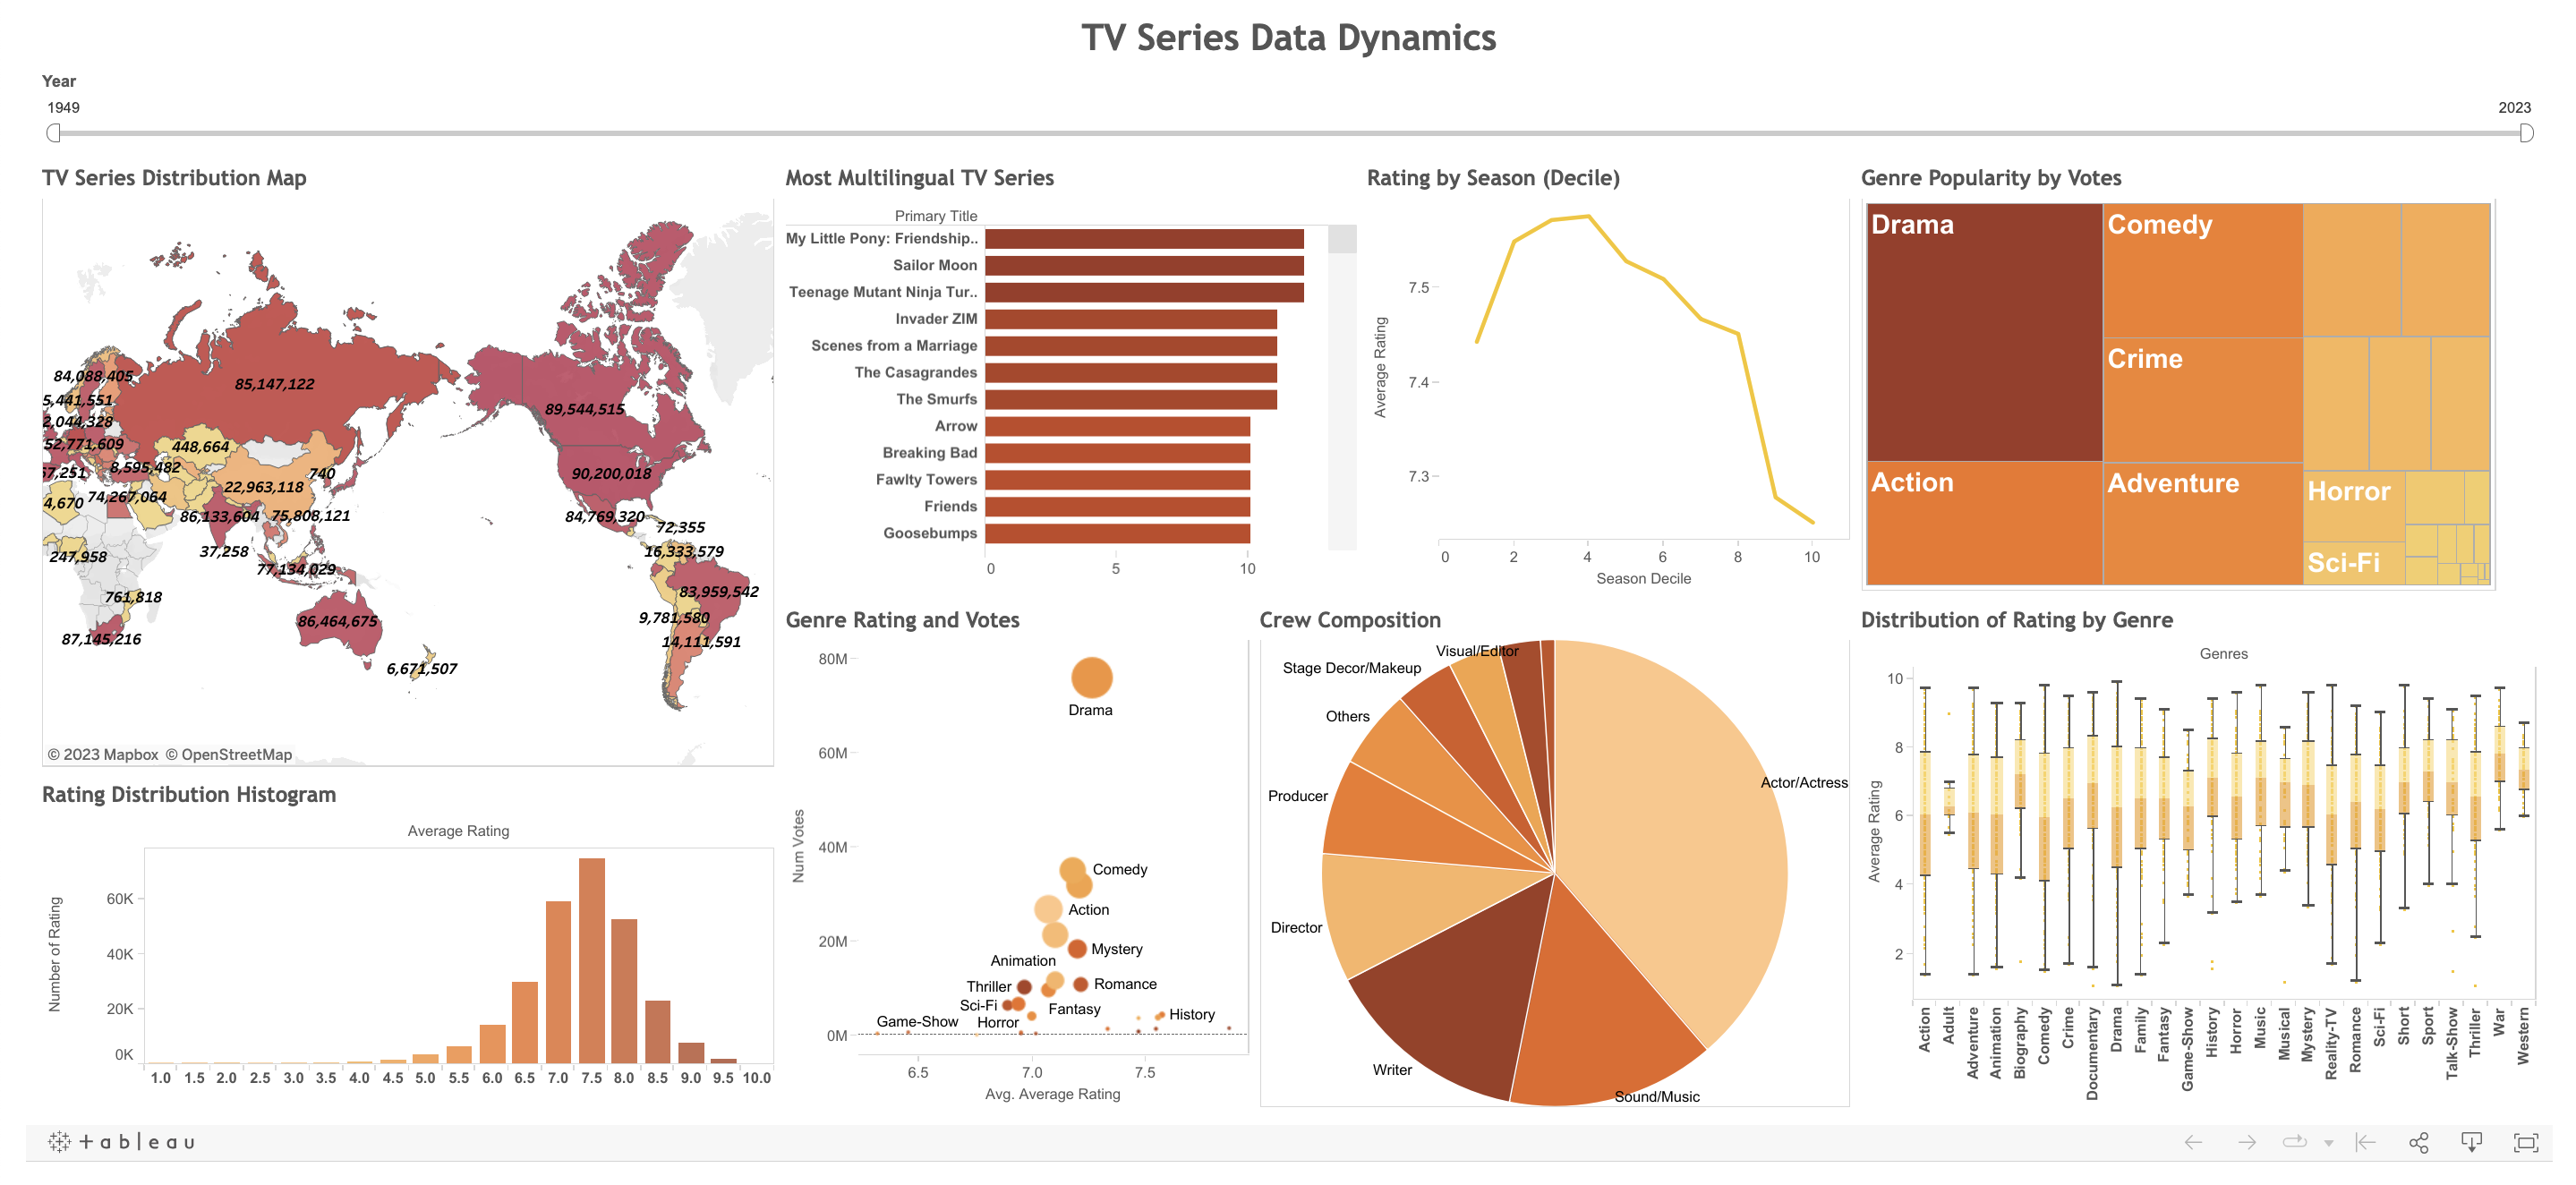

# **IX. References**

Country mapping - ISO, continent, region. (2019, December 15). Kaggle. https://www.kaggle.com/datasets/andradaolteanu/country-mapping-iso-continent-region

IMDb.com. (n.d.-b). IMDb Non-Commercial Datasets. IMDb. https://developer.imdb.com/non-commercial-datasets/

IMDB Help Center. (n.d.). Country codes. https://help.imdb.com/article/contribution/other-submission-guides/country-codes/G99K4LFRMSC37DCN?ref_=helpart_nav_6#

OpenAI. "GPT-3.5." OpenAI, 2021, https://www.openai.com.
(ChatGPT suggests some advanced query methods to help us clean the table. For example, "UNNEST(SPLIT(, ','))" and "r'\N'", we can use to split the text bundled in the same column and remove special null values. Also, ChatGPT helped us to debug the query to make sure they achieved our original ideas. Other than that we used ChatGPT to clarify the issues we encountered in Tableau, there was an issue with our data extract and unfortunately it could not resolve the issue, but we did solve it by ourselves eventually.)
